### 0. Packages

In [9]:
%load_ext autoreload
%autoreload 2

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics.pairwise import cosine_similarity

# Text manipulation
#import fasttext

# Custom modules
from data_wrangling.cmu_wrangling import *
from analysis.horror_movie_metadata import *
from analysis.actor_profile import *
from analysis.triggers import *
from analysis.tropes import *
from analysis.cultural import *
from analysis.historical import *
from analysis.titles import *

# Set plotting style
plt.style.use('dark_background')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1. Importing data

In [3]:
CMU = get_CMU()

In [4]:
Horror_movies, merged_df = get_Horror_movies_and_merged_df(CMU)

In [5]:
CMU.rename(columns={'Weekipedia_ID': 'Wikipedia movie ID'}, inplace=True)
Horror_movies.rename(columns={'Weekipedia_ID': 'Wikipedia movie ID'}, inplace=True)

In [6]:
df_hist = get_df_hist(merged_df)

In [7]:
merged, triggers = get_merged_and_triggers(Horror_movies)

In [8]:
print('Number of movies in horror dataset :', len(Horror_movies))
print('Number of common movies :',len(merged))

Number of movies in horror dataset : 34955
Number of common movies : 10226


# 2. Analysis

## 2.1 Horror Movie Metadata Analysis

This first part of the analysis aims to take a quick look at the datasets and evaluate the number of nans.
In addition, it aims to find specificities in the 'metadata' of horror movies as compared to other genres.
More concretely, this part of the code looks at the distribution of movie release over the years and at the countries that produce most of the movies.

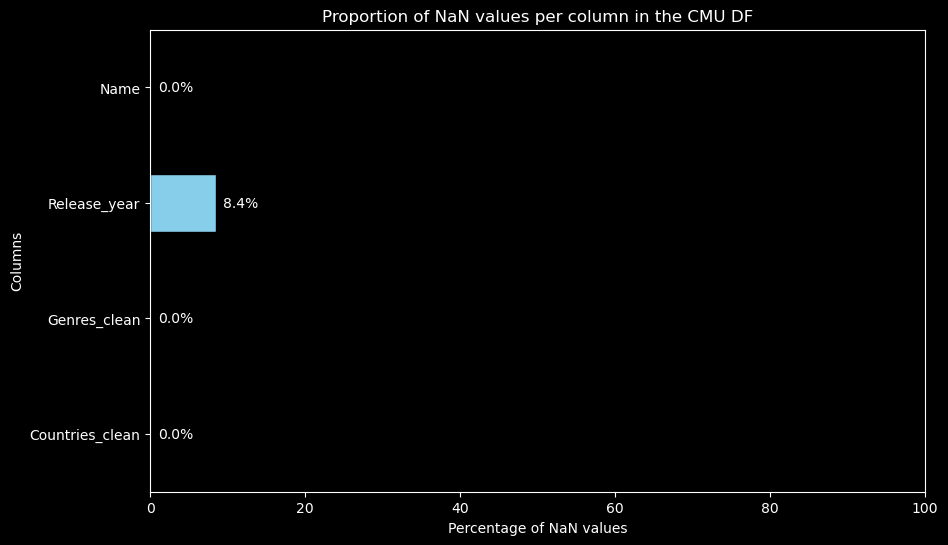

In [9]:
plot_nan_proportion(CMU, 'CMU', columns=['Name', 'Release_year','Genres_clean', 'Countries_clean'])

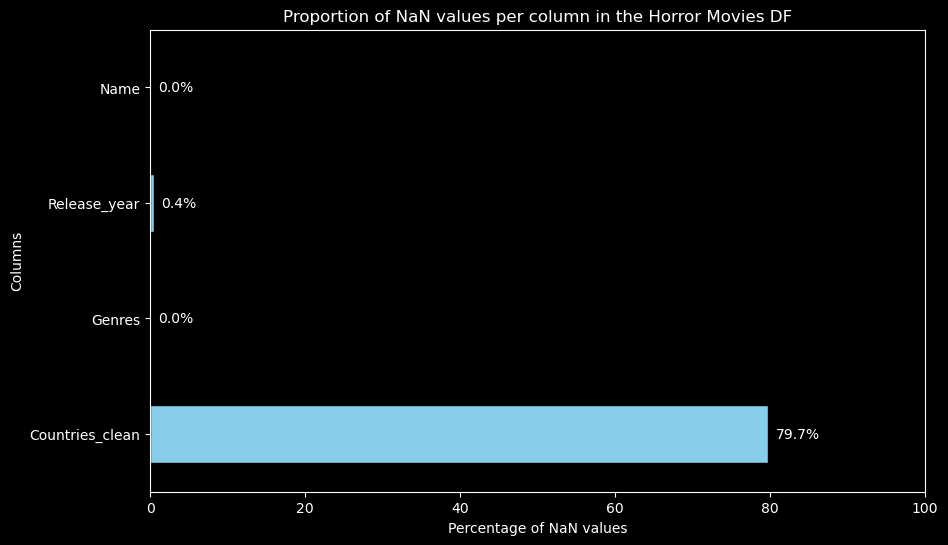

In [10]:
plot_nan_proportion(Horror_movies, 'Horror Movies', columns=['Name', 'Release_year','Genres', 'Countries_clean'])

These plots show that there are many missing values for the countries in the horror movie data set, due to the additional dataset. Thus, we will need to be careful in further analyses of the countries.

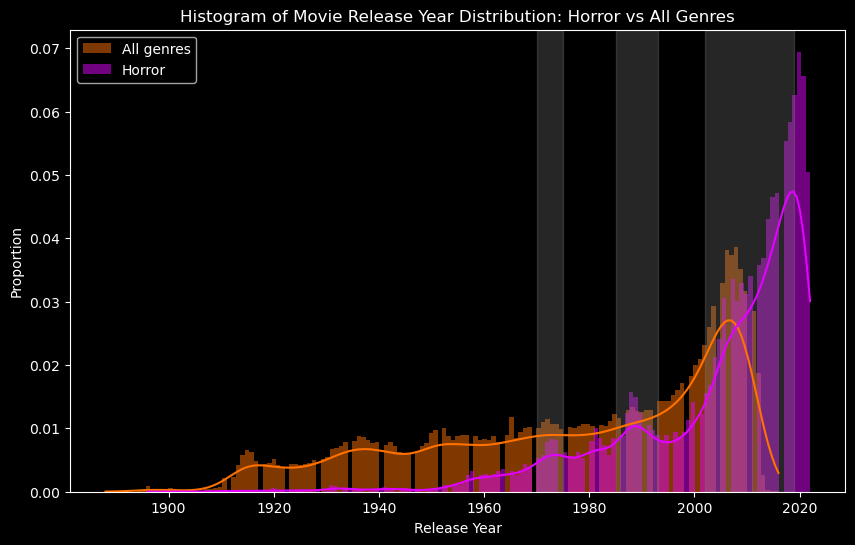

In [11]:
plot_movies_distribution_hist(CMU, Horror_movies)

In [12]:
# statistical test
ks_statistic, p_value = stats.ks_2samp(CMU['Release_year'].dropna(), Horror_movies['Release_year'].dropna())

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  
if p_value < alpha:
    print("The distributions are significantly different.")
else:
    print("The distributions are not significantly different.")


KS Statistic: 0.46549518536894285
P-value: 0.0
The distributions are significantly different.


Taking a first look at the distribution of movie release across the years allows to see that there are some differences between horror movies and other movies. In addition, some peaks are visible on the graph and it would be interesting to further investigate if these peaks are due to some historical or societal events.

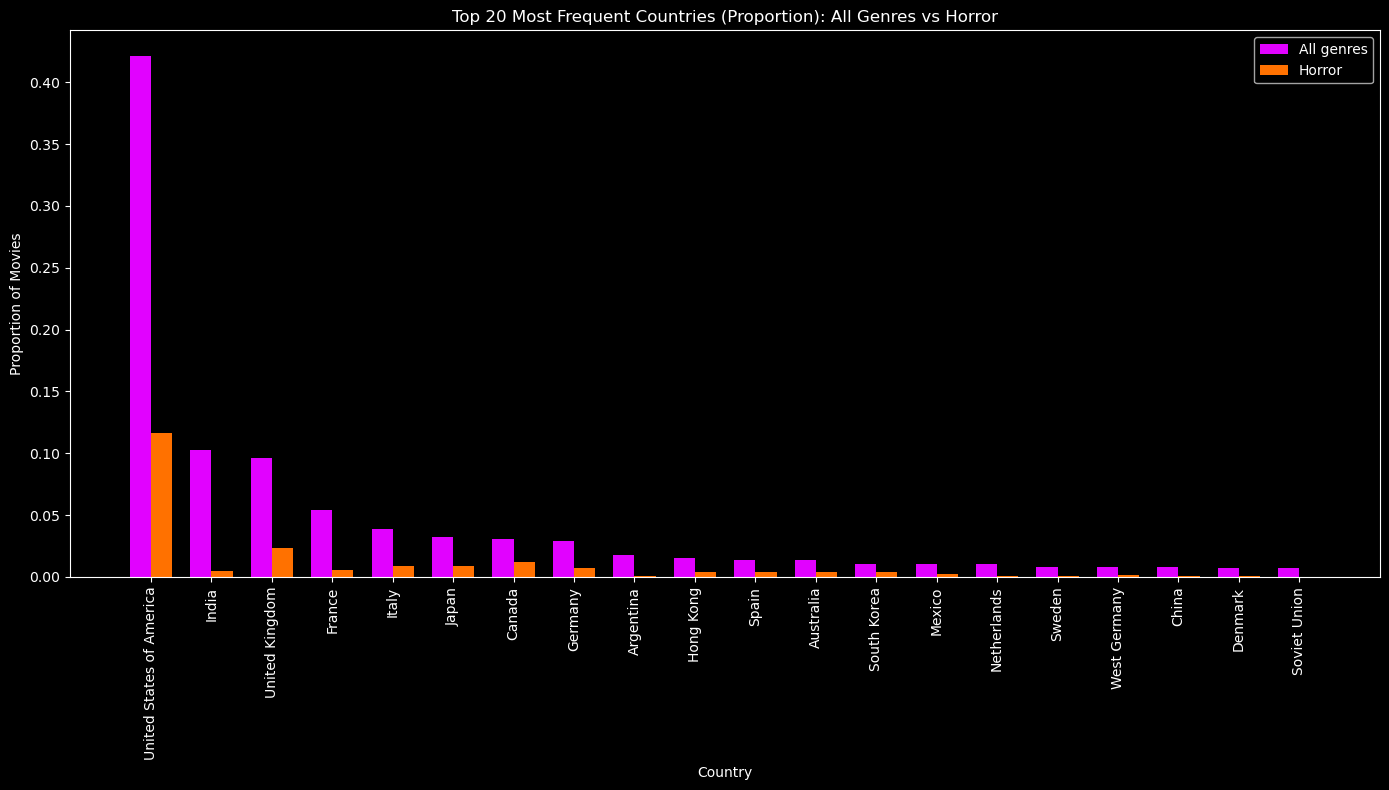

In [13]:
# COMPARE THE COUNTRIES IN WHICH THE MOVIES WHERE PRODUCED
plot_movies_countries_distribution(CMU, Horror_movies)

The chart reveals that very few countries produce a substantial proportion of horror movies, with the United States being the clear leader. While many countries have significant film industries across all genres (indicated by the purple bars), the orange bars for horror are much smaller or nearly absent in most countries. This suggests that horror is a niche genre in many parts of the world, and its distribution does not mirror that of general film production. The U.S. stands out as the primary contributor to horror, while other countries produce fewer horror films relative to their overall output.
It would be interesting to further investigate why this is the case

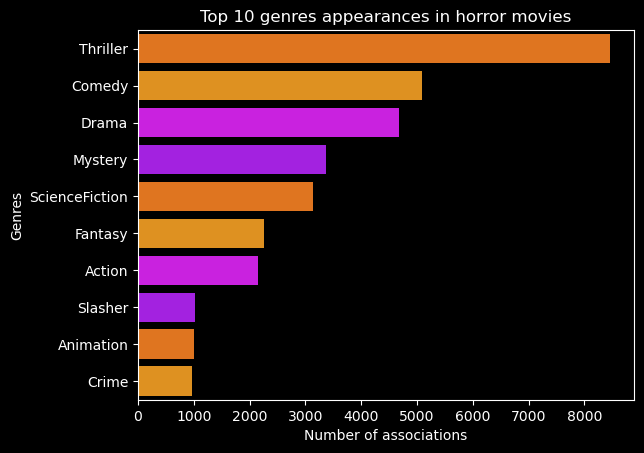

In [14]:
plot_most_represented_associated_genres(Horror_movies)

In this plot we can see the most represented genres in link with horror movies. As expected Thriller, Comedy and Drama are the top three. Surprinsingly, Crime is only placed at the 10th place.

Mann-Whitney U test's pvalue is 0.0063873670253678716, which is significative


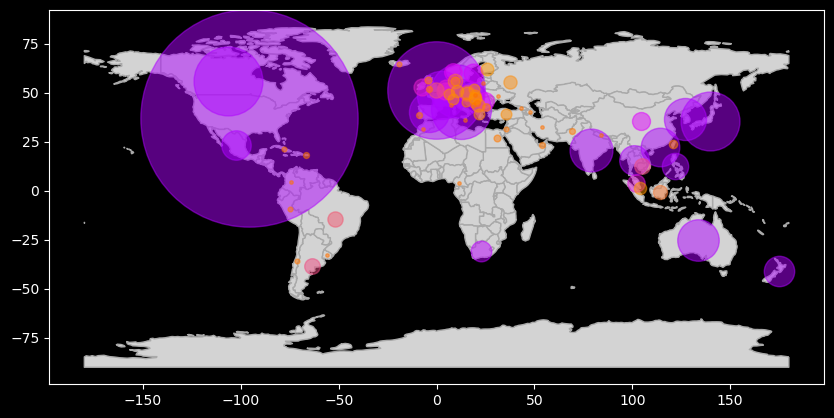

In [15]:
plot_movies_world_map(Horror_movies)
stat, pvalue = testing_occidental_countries(Horror_movies)
print(f"Mann-Whitney U test's pvalue is {pvalue}, which is significative")

In this world map, we can observe the locations where horror films are produced. The robust Mann-Whitney test reveals a significant difference in rankings between Occidental and non-Occidental countries. Clearly, the USA and Europe are major production hubs in Occidental countries. In contrast, highly populated non-Occidental countries such as India and China are among the largest producers, as expected. Japan and Korea, however, stand out as outliers due to their highly developed and influential cinematic industries.

## 2.2 Actor profile

This part of the code aims to take a look at the gender and ethnicity of the actors and compare the distribution between horror movies and other genres to see if there is a significant difference.

In [16]:
# merge actors with movies
Horror_movies_with_actors = get_df_with_actors(Horror_movies)
CMU_with_actors = get_df_with_actors(CMU)

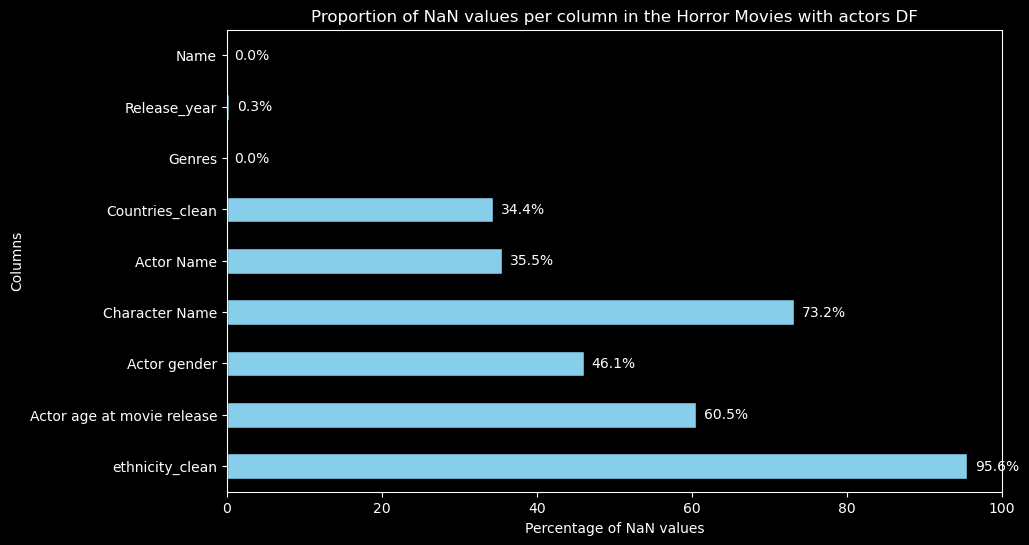

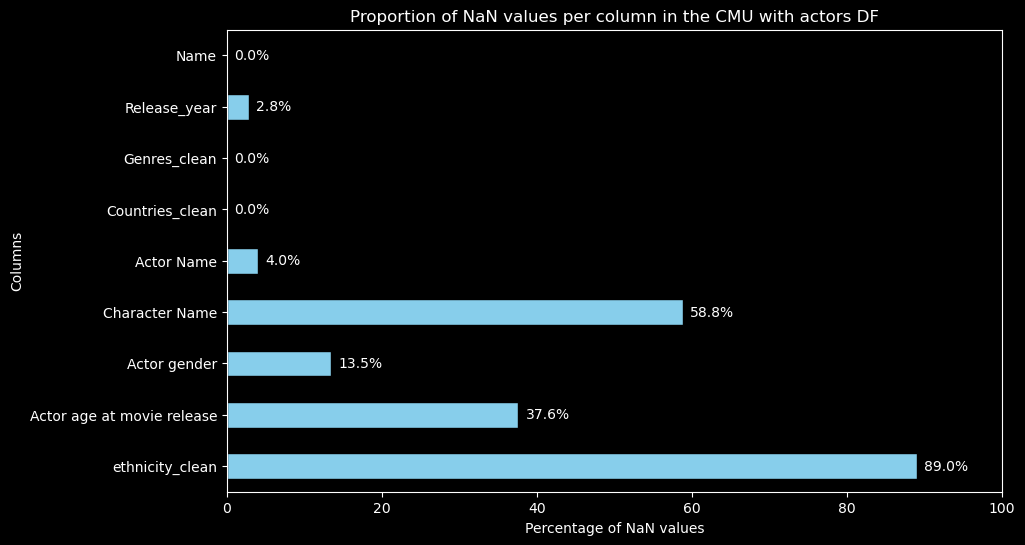

In [17]:
plot_nan_proportion(Horror_movies_with_actors, 'Horror Movies with actors' ,columns=['Name', 'Release_year','Genres', 'Countries_clean', 'Actor Name', 'Character Name', 'Actor gender','Actor age at movie release', 'ethnicity_clean'])
plot_nan_proportion(CMU_with_actors, 'CMU with actors', columns=['Name', 'Release_year','Genres_clean', 'Countries_clean', 'Actor Name','Character Name', 'Actor gender','Actor age at movie release', 'ethnicity_clean'])

We can see that there is a significant amount of missing values, especially for the actor ethnicity, we will need to make sure that the results can still be used and are significant.

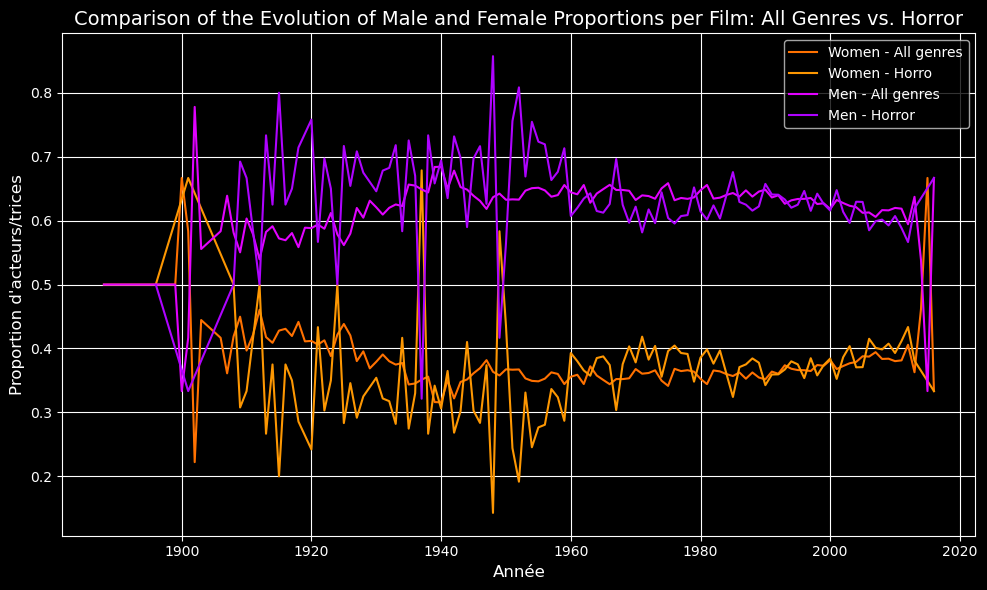

In [18]:

# LOOK AT PROPORTION OF MEN AND WOMEN IN MOVIES OVER THE YEARS AND COMPARE HORROR AND ALL GENRES
CMU_mean_women_proportion, CMU_mean_men_proportion = compute_gender_proportions(CMU_with_actors)
Horror_mean_women_proportion, Horror_mean_men_proportion = compute_gender_proportions(Horror_movies_with_actors)

plot_men_women_proportions(CMU_mean_women_proportion, CMU_mean_men_proportion,
                            Horror_mean_women_proportion, Horror_mean_men_proportion)

In all genres, the gender distribution seems quite constant across the years (approx. 60% men and 40% women). However, in horror movies, the proportions seem more variable until the 1960's. We could further investigate whether this could be linked with the rise of feminism in the 1960's.

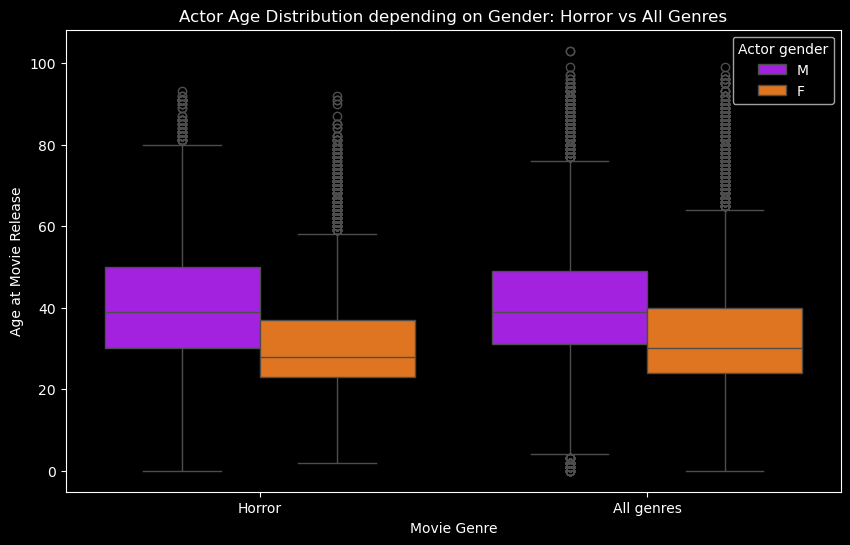

In [19]:
# VERIFY IF THERE IS A DIFFERENCE IN THE AGE OF ACTORS BETWEEN MEN AND WOMEN AND BETWEEN HORROR AND ALL GENRES
plot_age_differences_women_men(Horror_movies_with_actors, CMU_with_actors)

This plot does not seem to show very signicant differences in terms of actor age depending on actor gender or movie genre.

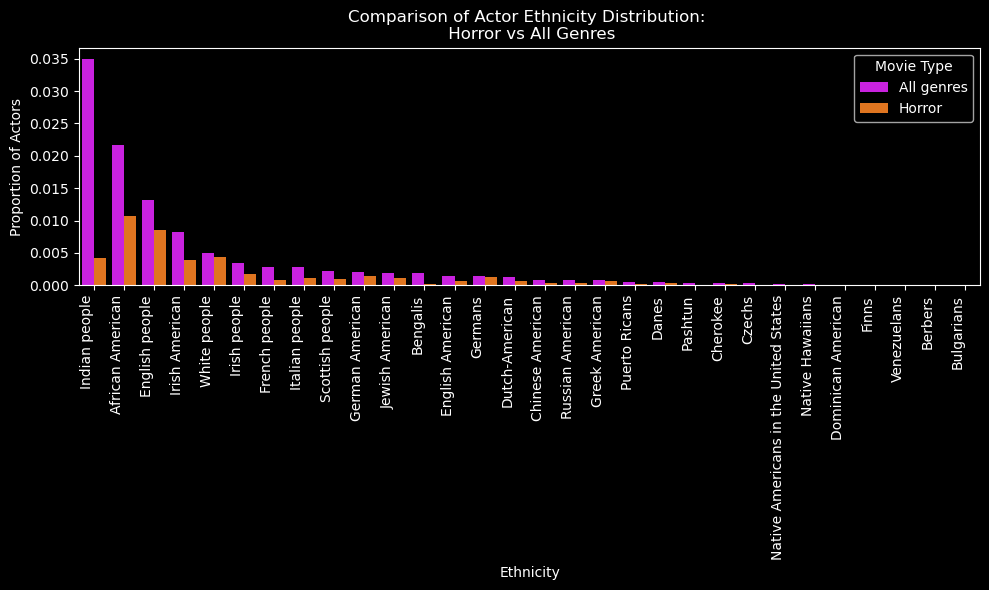

In [20]:
# LOOK AT ACTOR ETHNICITY DISTRIBUTION AND COMPARE BETWEEN HORROR AND ALL GENRES
plot_ethnicity_actors(Horror_movies_with_actors, CMU_with_actors)

This plot shows that the most frequent actor ethnicities are not the same in horror movies as compared to other genres. We could further investigate if there is a correlation with the character types.

## 2.3 Tropes

This part of the code aims to take a first look at the tropes dataset and see if there are some specific profiles (gender, ethicity, etc.) for some of the tropes.
As shown below the tropes dataset only covers a very small part of the dataset. To further investigate tropes, we would need to find another dataset or use maybe use ChatGPT to find the 'character types' of the actors with missing information. Alternatively, looking at the summaries could also be an option to find information about 'character types'.

In [21]:
# LOAD AND PROCESS THE TROPES DF
tv_tropes = get_tv_tropes()

In [22]:
# merge tropes with actors and movies
Horror_movies_with_actors_tropes = get_df_with_tv_tropes(Horror_movies_with_actors, tv_tropes)
CMU_with_actors_tropes = get_df_with_tv_tropes(CMU_with_actors, tv_tropes)

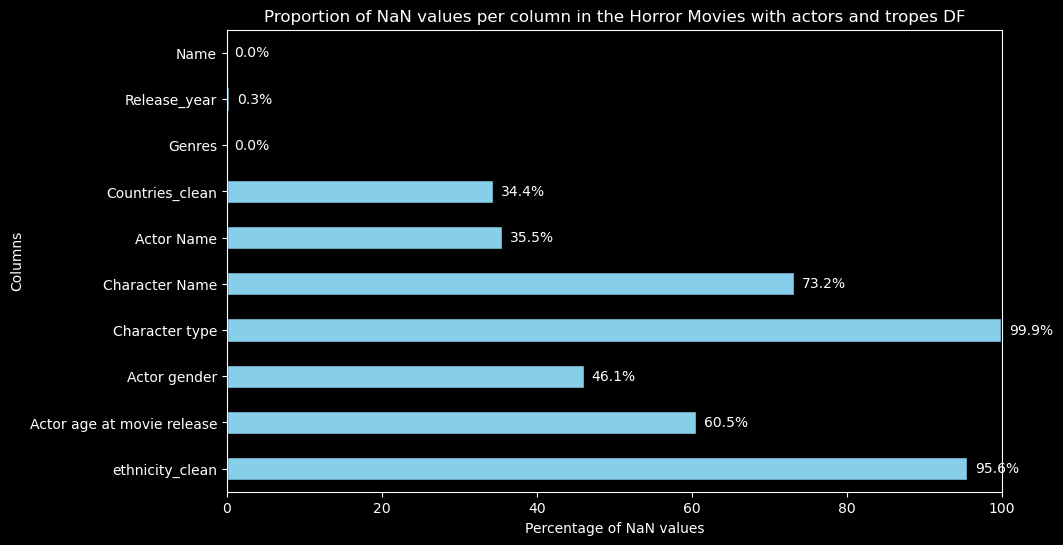

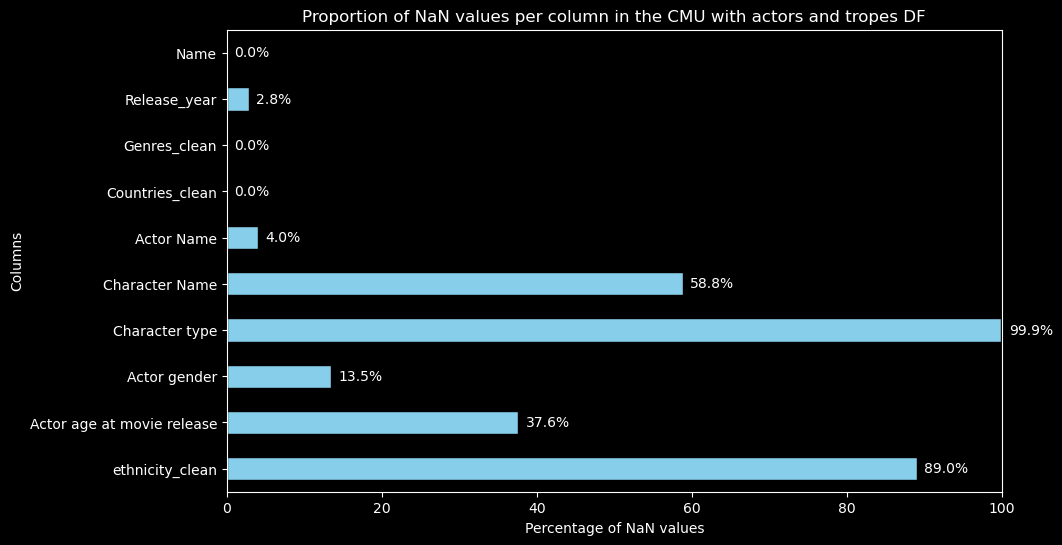

In [23]:
# nan diagnostic
plot_nan_proportion(Horror_movies_with_actors_tropes, 'Horror Movies with actors and tropes' ,columns=['Name', 'Release_year','Genres', 'Countries_clean', 'Actor Name', 'Character Name', 'Character type', 'Actor gender','Actor age at movie release', 'ethnicity_clean'])
plot_nan_proportion(CMU_with_actors_tropes, 'CMU with actors and tropes', columns=['Name', 'Release_year','Genres_clean', 'Countries_clean', 'Actor Name','Character Name', 'Character type','Actor gender','Actor age at movie release', 'ethnicity_clean'])


As mentionned above, almost all the movies and actors lack trope information.

In [24]:
#first look at tropes in horror movie df
Horror_movies_with_actors_tropes['Character type'].value_counts()

Character type
final_girl                     11
father_to_his_men               5
jerk_jock                       5
corrupt_corporate_executive     3
crazy_jealous_guy               3
dumb_blonde                     3
egomaniac_hunter                2
klutz                           2
valley_girl                     1
stoner                          1
crazy_survivalist               1
absent_minded_professor         1
cultured_badass                 1
charmer                         1
bully                           1
coward                          1
ophelia                         1
bromantic_foil                  1
brainless_beauty                1
slacker                         1
morally_bankrupt_banker         1
broken_bird                     1
master_swordsman                1
granola_person                  1
bruiser_with_a_soft_center      1
henpecked_husband               1
heartbroken_badass              1
Name: count, dtype: int64

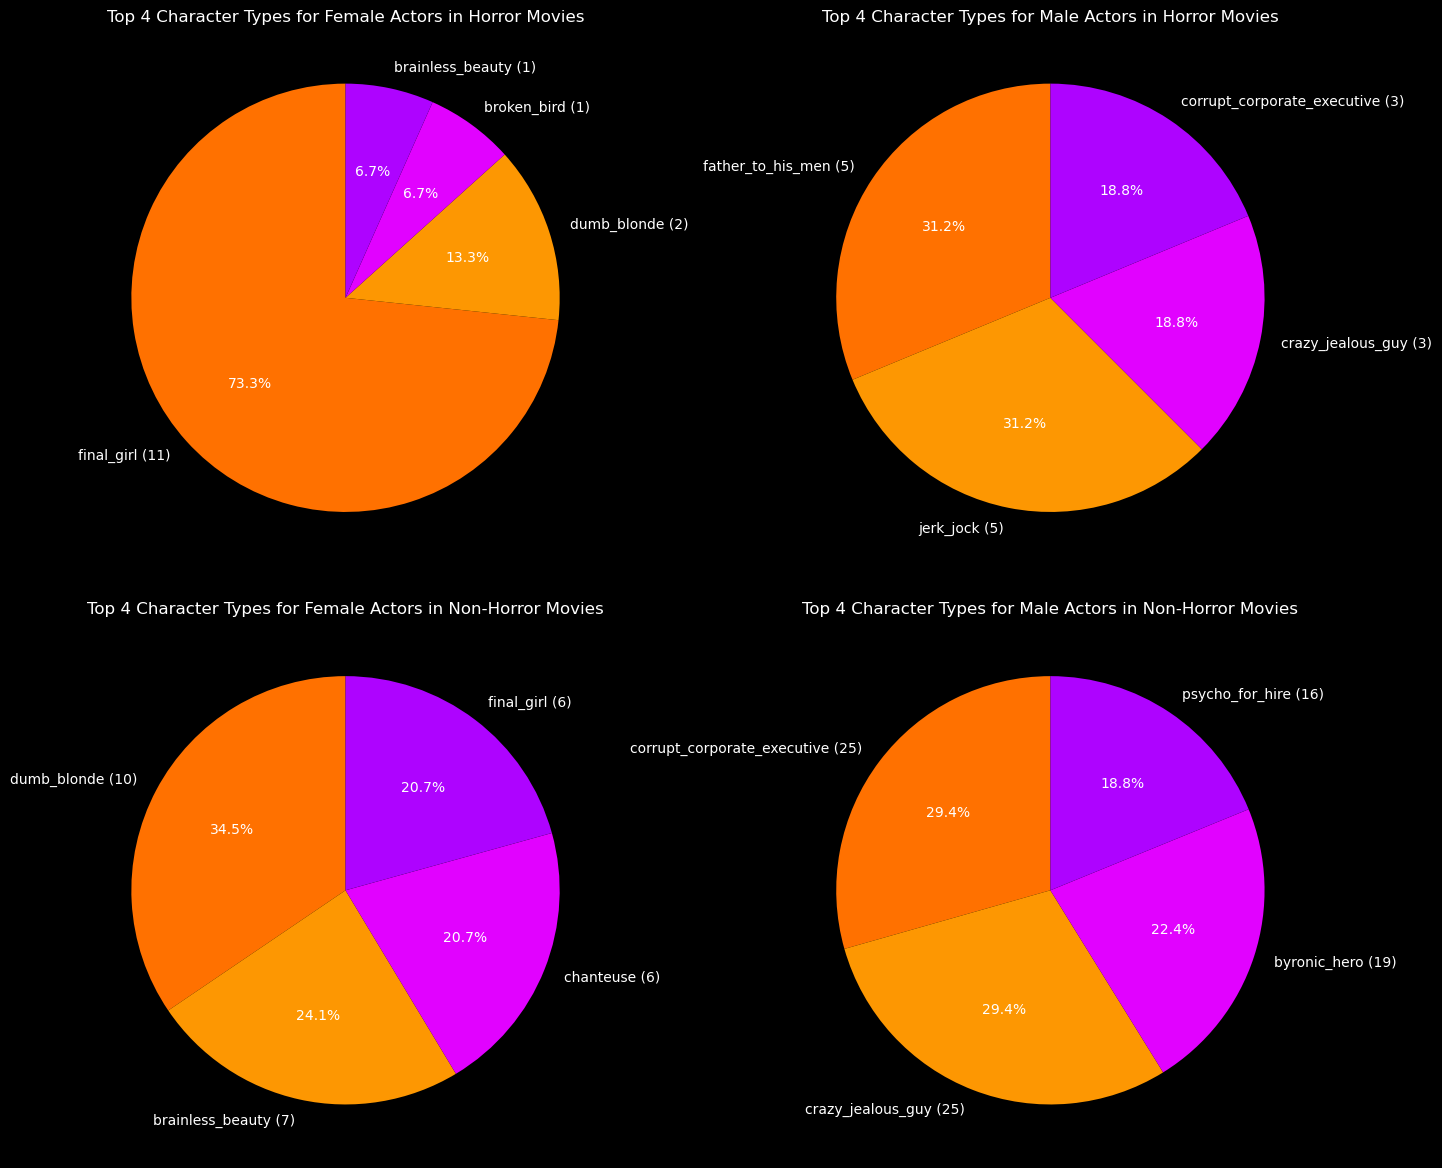

In [25]:
# TAKE A LOOK AT THE TROPES DEPENDING ON GENRE, GENDER, ETHNICITY ETC.
plot_top4_types(Horror_movies_with_actors_tropes, CMU_with_actors_tropes)

The results are interesting but clearly not significant with this amount of information.

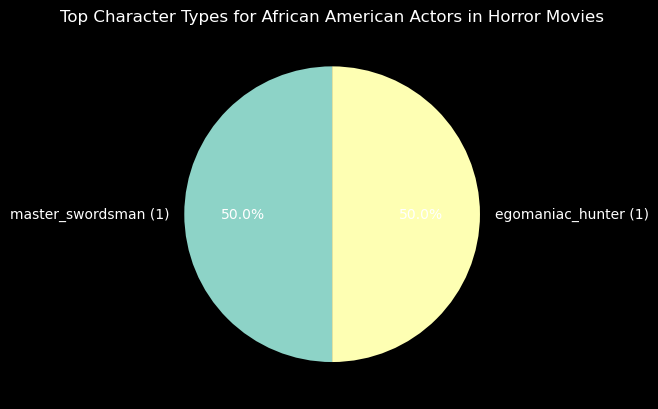

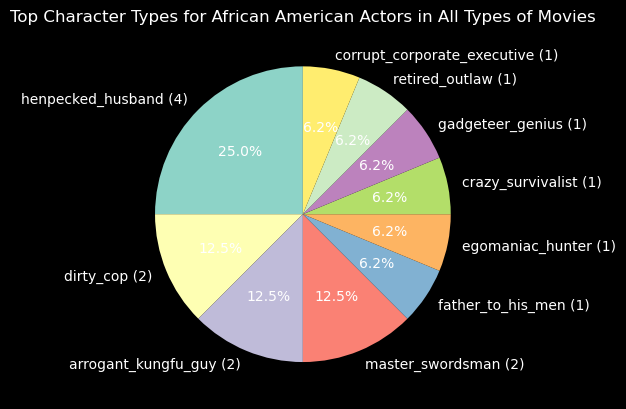

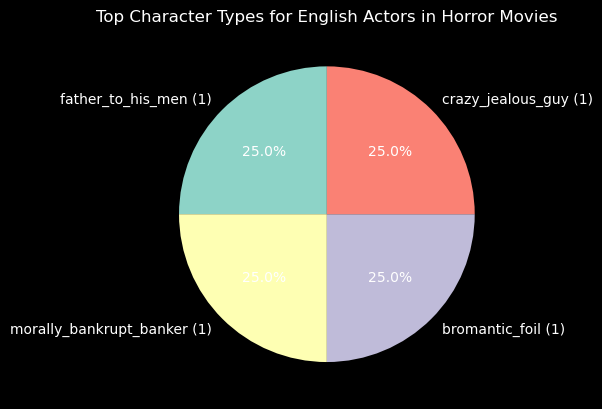

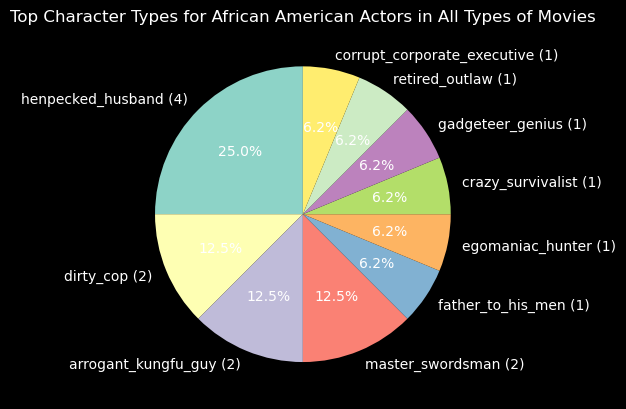

In [26]:
get_character_count(Horror_movies_with_actors_tropes, 'ethnicity_clean', 'African American', 10, 'Top Character Types for African American Actors in Horror Movies', plot=True)
get_character_count(CMU_with_actors_tropes, 'ethnicity_clean', 'African American', 10, 'Top Character Types for African American Actors in All Types of Movies', plot=True)

get_character_count(Horror_movies_with_actors_tropes, 'ethnicity_clean', 'English people', 10, 'Top Character Types for English Actors in Horror Movies', plot=True)
get_character_count(CMU_with_actors_tropes, 'ethnicity_clean', 'African American', 10, 'Top Character Types for African American Actors in All Types of Movies', plot=True);


## 2.4 Triggers

In [27]:
merged = df_movies_after_1950(merged)

In [28]:
trigger_counts = get_triggers_counts(merged)

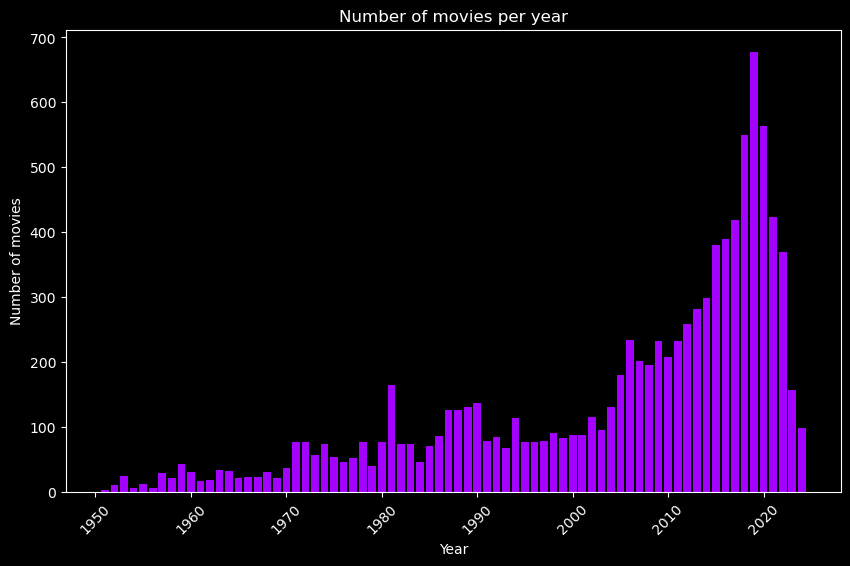

In [29]:
plot_movies_per_year(merged, trigger_counts)

This dataset was created merging the trigger dataset found on Doesthedogdie.com, and the common horror dataset used for the rest of the analysis. This allowed us to extract the horror content of the trigger dataset. For this part, we then use a dataset of 10 226 horror movies between 1950 and 2024.

### Analysis of content

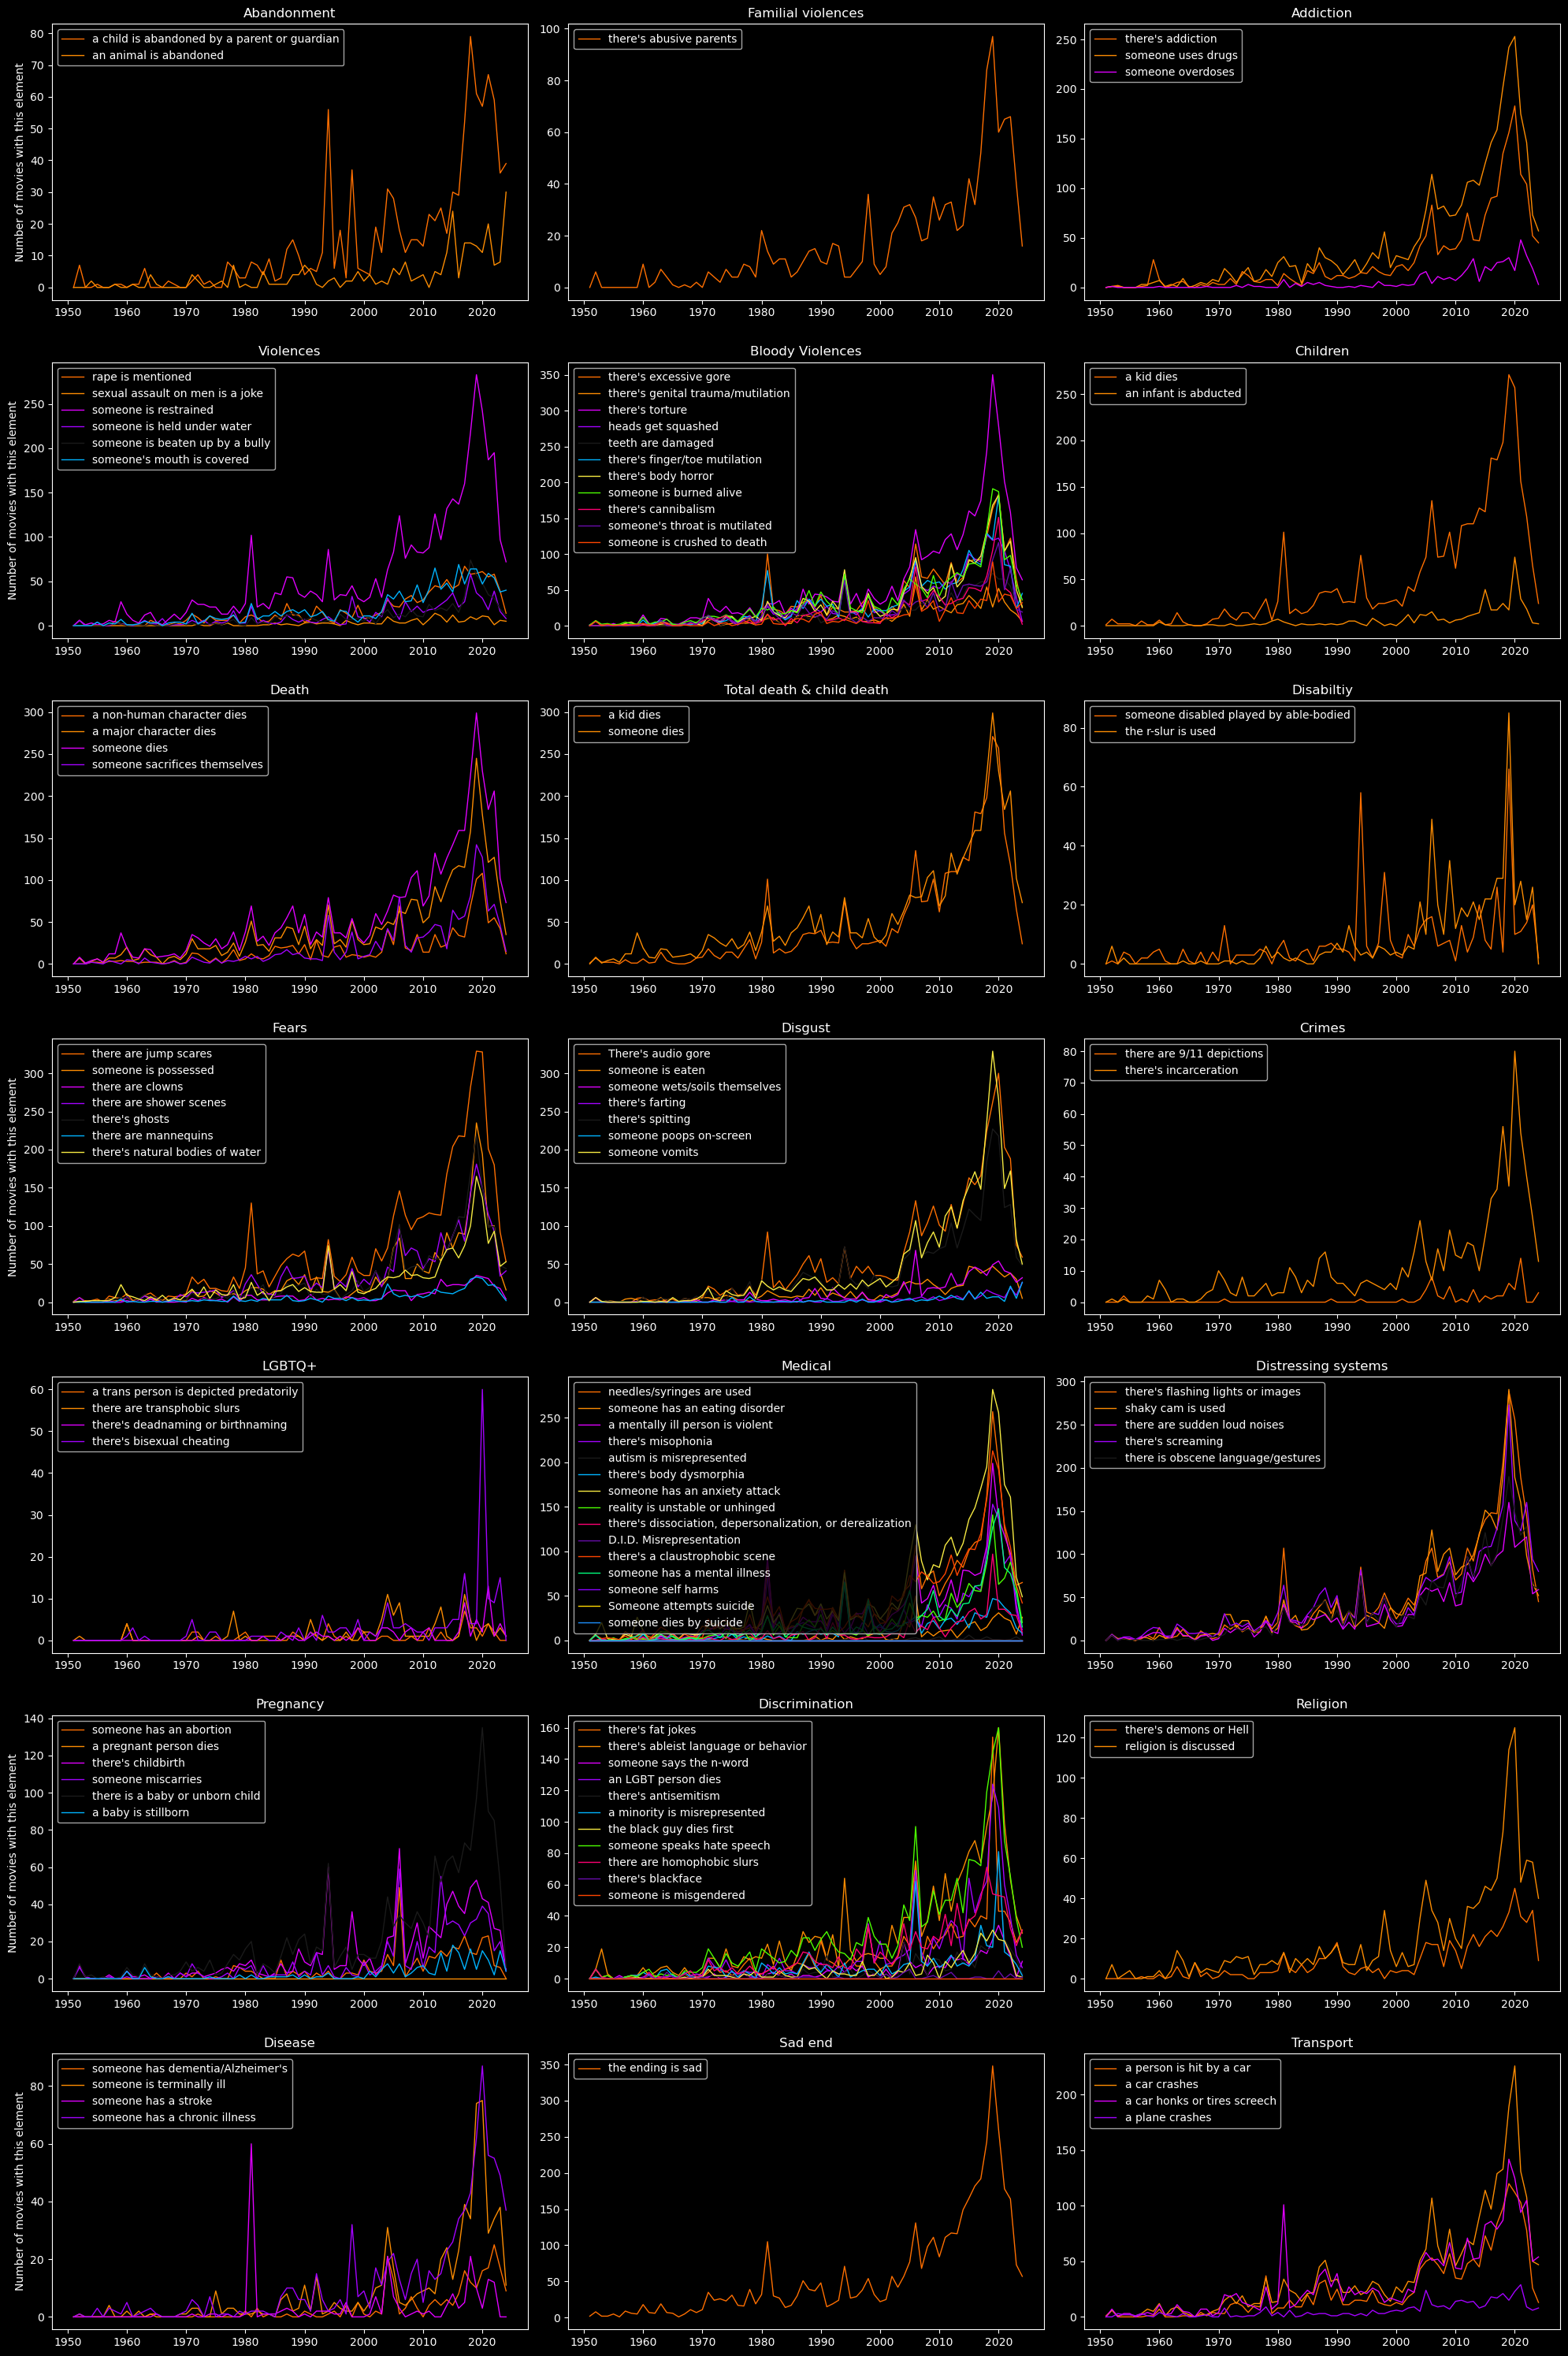

In [30]:
plot_movies_contents_number(merged, trigger_counts)

Here we visualize the number of movies per year that contain specific content. This allows us to compare the apparition of different triggers. Unfortunately, the apparition of each content follows the global repartition of movies per year. To get rid of this bias, we try again but after a standardization (the number of movies with a content is now divided by the total number of movies the same year).

### Standardization

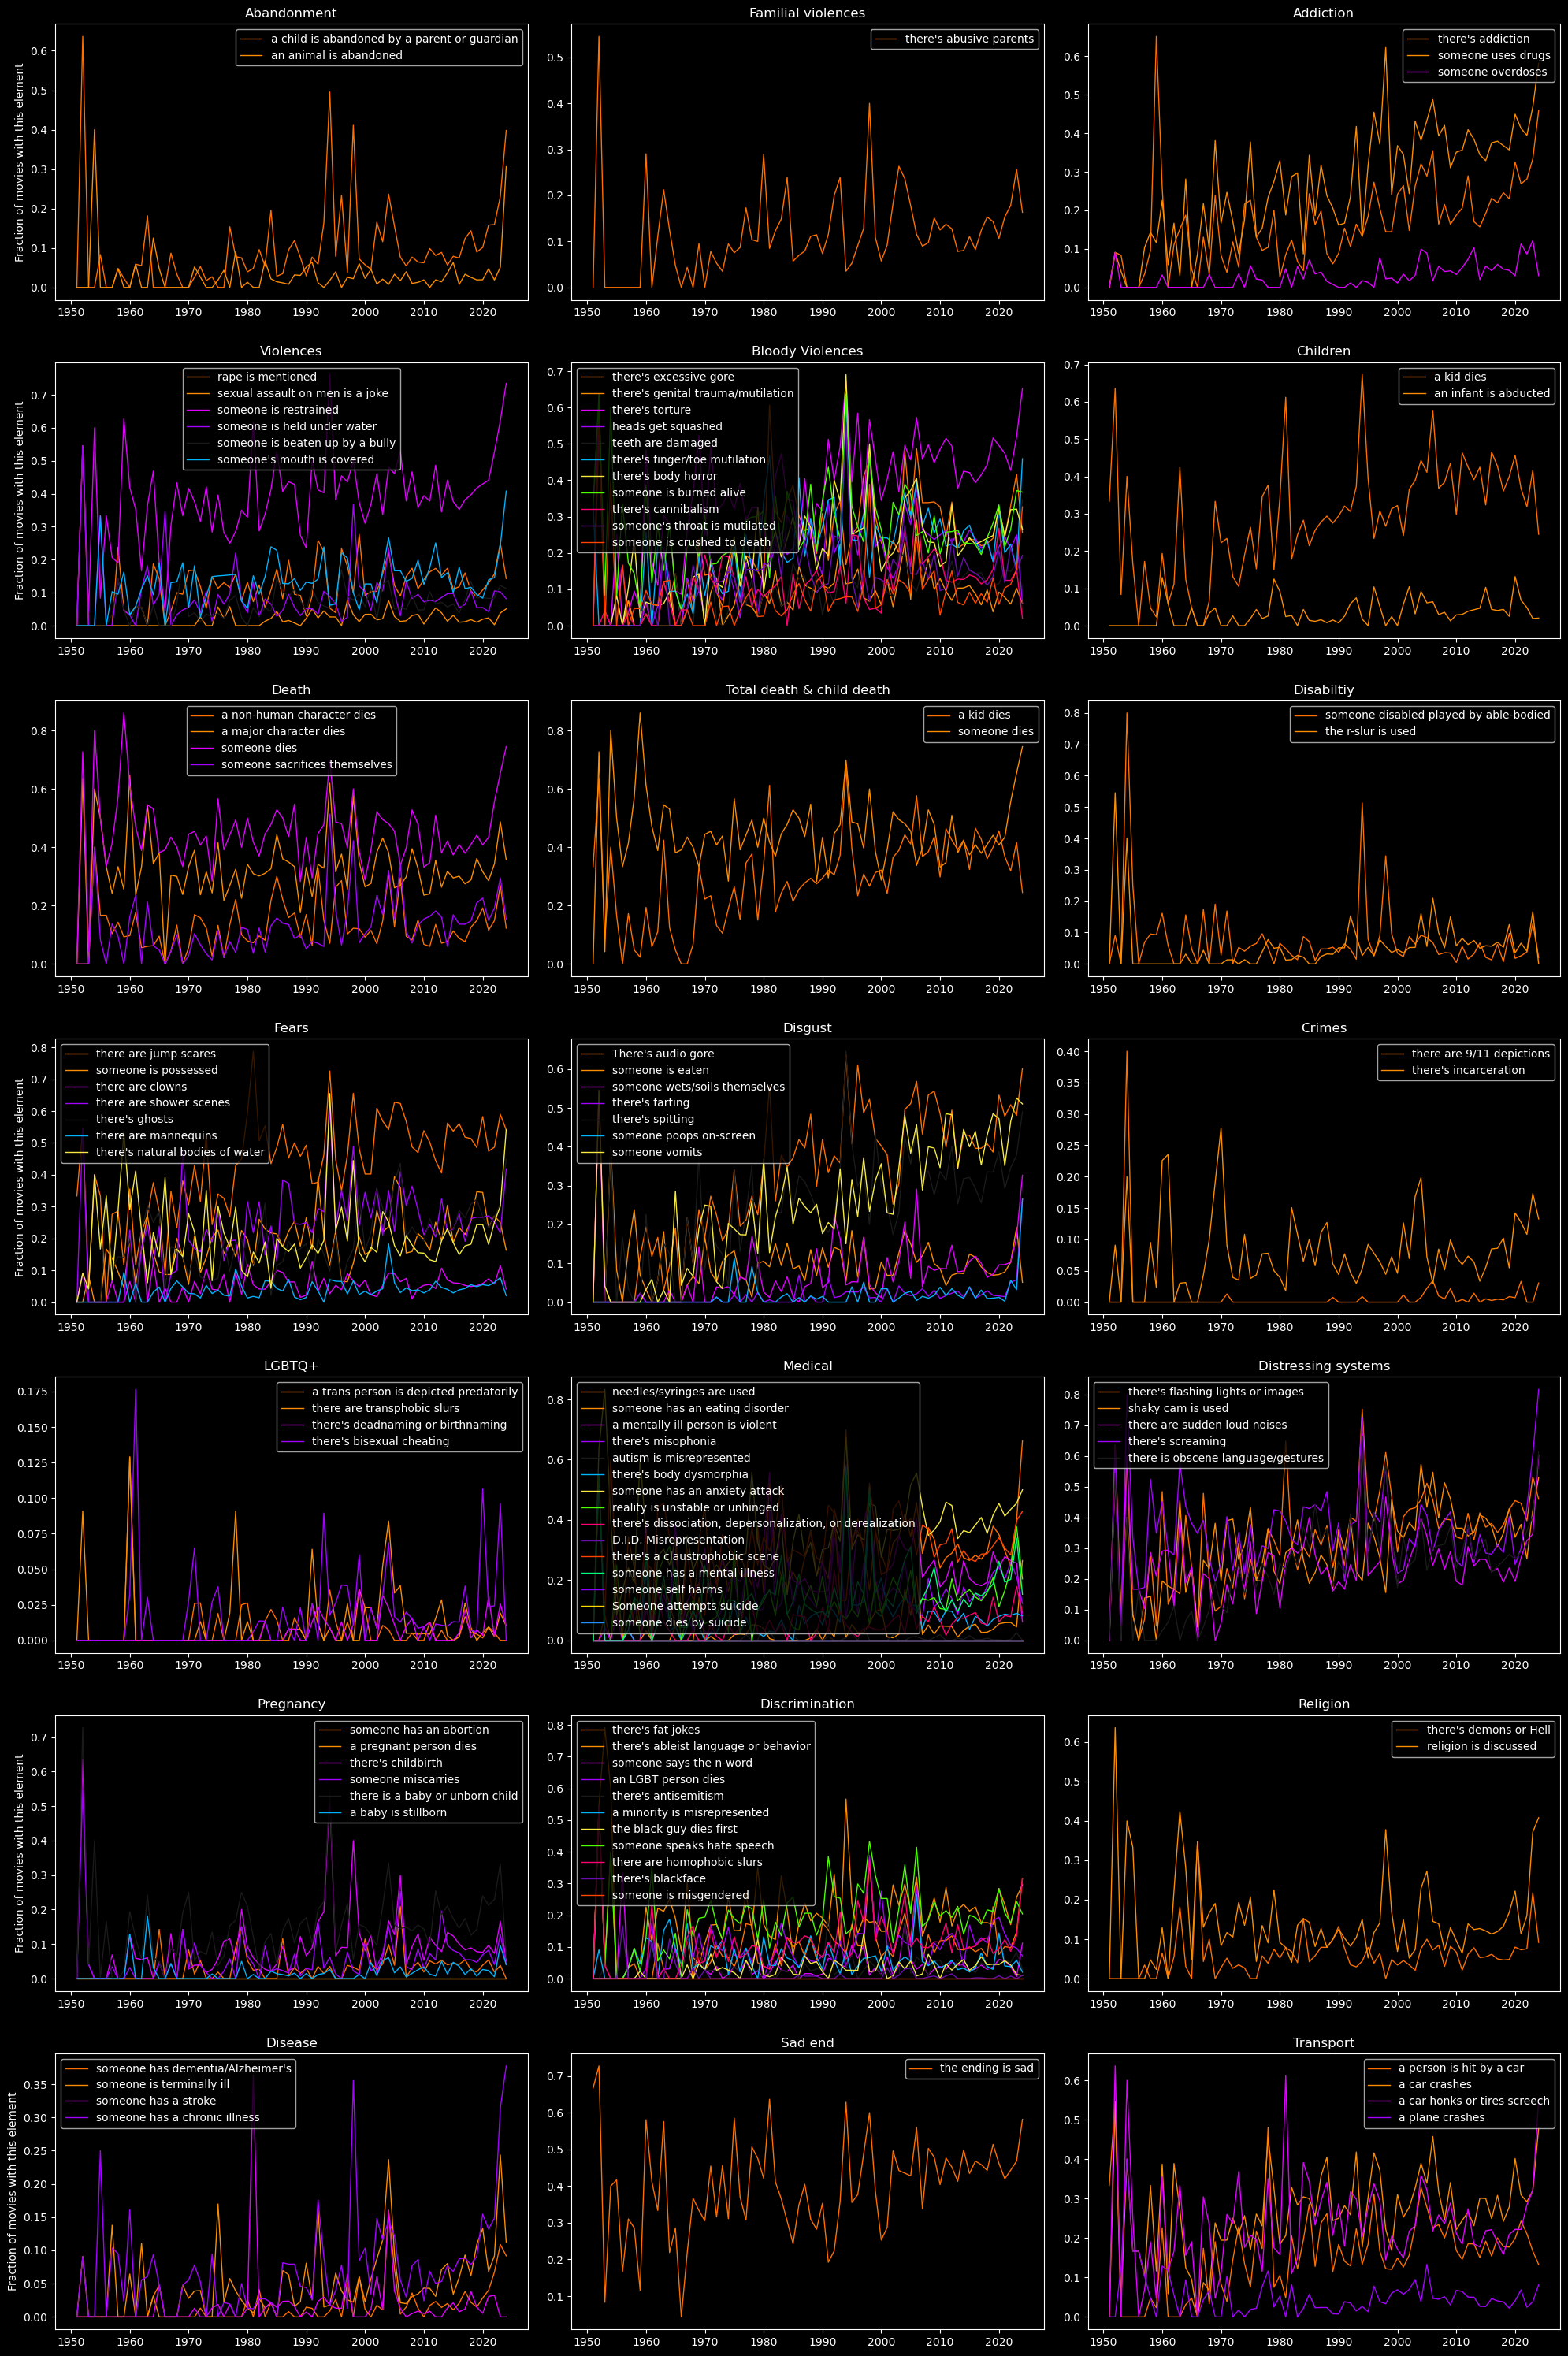

In [31]:
plot_movies_contents_proportion(merged, trigger_counts)

Now we can visualize the fraction of movies per year that contains each content. This is a better way to compare if some triggers appear more often than others, and when. We can already make some small observations. For example : let's look at the 'Total death vs Child death' graph. We can see that before 1900, there were more general death than child death. After this date, the two curves cross each other, showing that the children are more and more among the persons that will die in a movie. On the 'Children' graph, we can see that common 'horror' movies present more child death than abduction. While abduction is a terrifying subject, we could imagine that abductions happen more in 'action' movies (like Taken), while horror movies focus on more radical ends.

Now, can we find a correlation between each content? To do that, it is better to use some metrics.

### Correlation of the features

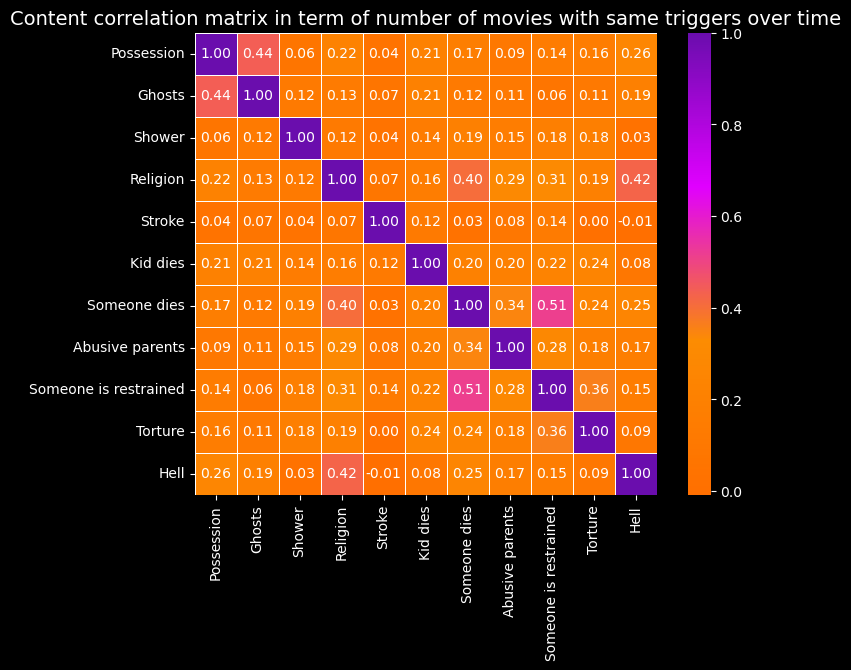

In [32]:
plot_correlation_matrix(merged)

Here is a correlation matrix between some content that were analyzed before (not all of them, this is an example). In this matrix, we analyse the correlation of apparition between two triggers in the same movie. Some observations make a lot of sense! For example: Ghost and Possession seem to have a positive correlation (their correlation coefficient is positive). Religion and Hell also seem to go together! 'Someone is restrained' and torture also show a correlation (We could think of the movies 'Saw' for example), and 'Someone is restrained' and Death too. Death and religion also seem to have some common points.

This kind of analysis can be extended for the +200 triggers of the dataset.

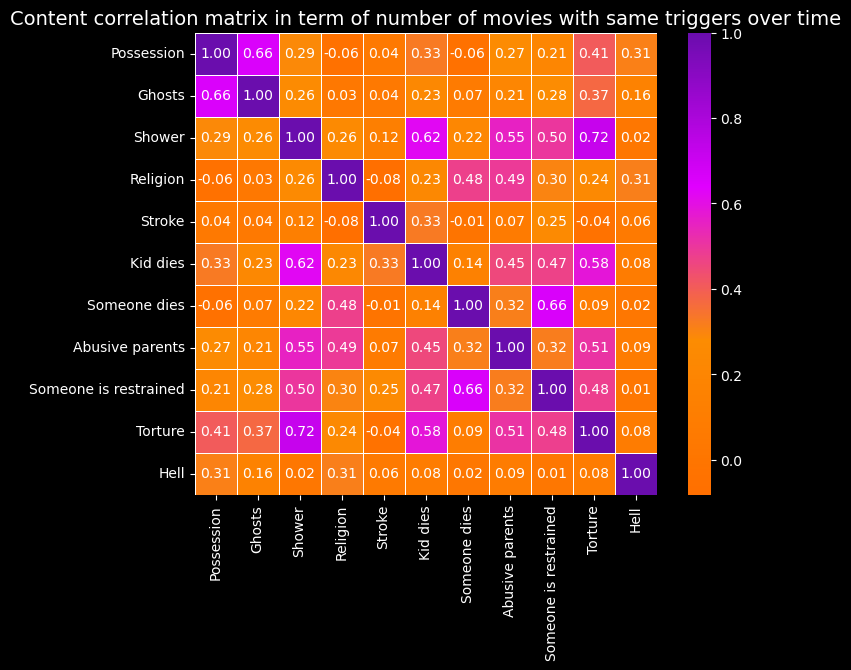

In [33]:
plot_correlation_matrix_counts(merged, trigger_counts)

Here is another way to check the correlation of each trigger. This time, we do not analyse their apparition in the same movies, but only their general timeline distribution over the year (as presented on the first graphs). The values are standardized to minimize the impact of the general movie distribution. The correlation values are higher because it doesn't need to take in account the apparition of two elements in the same movies, so it is less precise.

### Content repartition

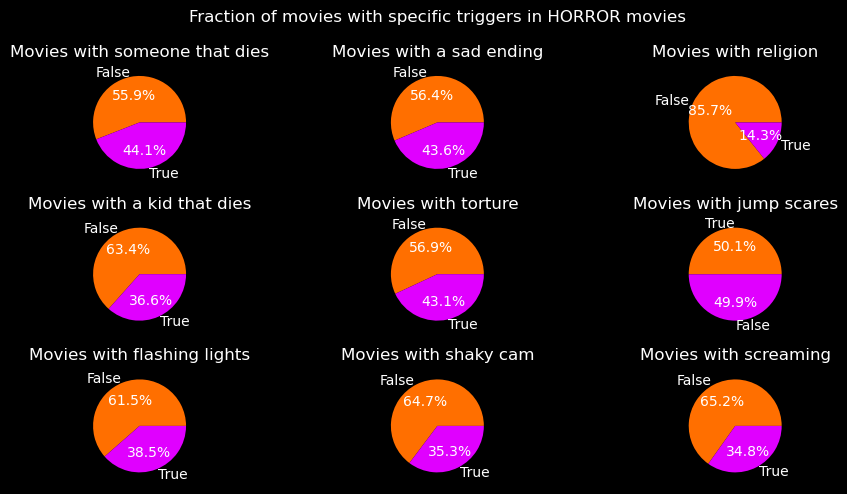

In [34]:
plot_content_repartition(merged)

Let's analyse some triggers one by one now. How often do they appear? Pie charts are very practical for that. Among 10 000 horror movies, almost half of them use jump scares! How original... And could you think about an other movie genre where 43.8% percent of them have a sad end? That's very specific to horror movies! But to be sure about it, we could plot the fraction of apparition of triggers for all the movies in the trigger dataset (that contains 49 803 movies of different genres).

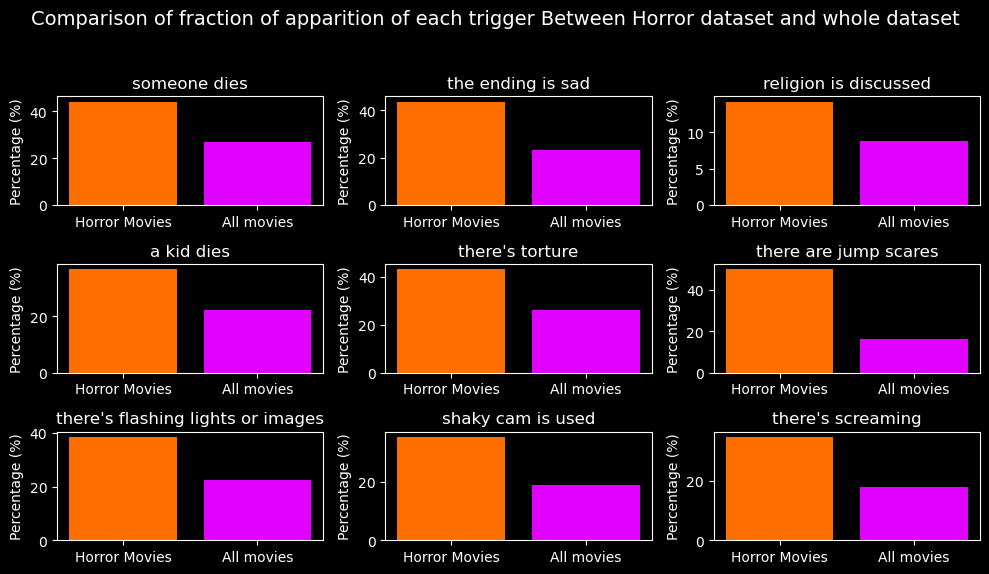

In [35]:
plot_trigger_apparition(merged, triggers)

Now we compare the fraction of apparition of each content in the 10 000 horror movies, and then in the 49 803 movies of the trigger dataset. It is very clear that sad ending happen more often in horror movies than in other genres! Like other contents that seem very specific to horror movies.

## 2.5 Cultural

Define keywords for common horror themes

In [36]:
keywords = get_horror_keywords()
keywords

{'religion': ['exorcism',
  'church',
  'priest',
  'god',
  'devil',
  'holy',
  'satan',
  'demon',
  'angel',
  'faith',
  'soul',
  'worship',
  'sacrifice',
  'vatican',
  'cross',
  'sin'],
 'zombies': ['zombie',
  'undead',
  'brain',
  'walking dead',
  'infected',
  'outbreak',
  'plague',
  'virus',
  'apocalypse',
  'living dead',
  'survival',
  'mutation',
  'quarantine'],
 'ghosts': ['ghost',
  'spirit',
  'haunted',
  'poltergeist',
  'apparition',
  'haunting',
  'specter',
  'paranormal',
  'supernatural',
  'medium',
  'seance',
  'grave',
  'curse',
  'ectoplasm'],
 'monsters': ['monster',
  'creature',
  'beast',
  'mutant',
  'alien',
  'abomination',
  'giant',
  'claws',
  'fangs',
  'terror',
  'mutation',
  'slaughter',
  'predator'],
 'psychological': ['insanity',
  'madness',
  'paranoia',
  'delusion',
  'obsession',
  'hallucination',
  'disturbed',
  'psychopath',
  'crazy',
  'mind',
  'fear',
  'anxiety',
  'trauma'],
 'slasher': ['killer',
  'serial',
 

Search for the themes in the summaries

          ID       Theme
0          1    survival
1          1    dark web
2          2     zombies
3          2     slasher
4          2  technology
...      ...         ...
86100  34951     slasher
86101  34951       cults
86102  34955      ghosts
86103  34955     slasher
86104  34955    haunting

[86105 rows x 2 columns]


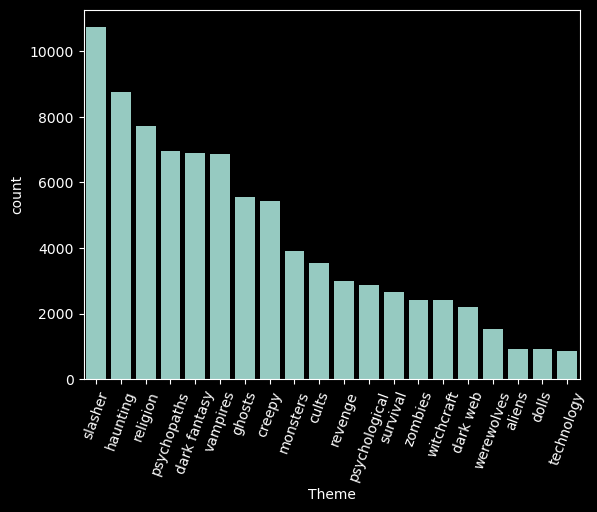

In [37]:
df = get_summaries_themes()
print(df)

In [38]:
df1 = get_df1(Horror_movies)
df1.head()

ID                   Country         Region
30  31  United States of America  North America
32  33  United States of America  North America
38  39  United States of America  North America
48  49                     Italy         Europe
50  51  United States of America  North America

In [39]:
merged_df = get_merged_df(df, df1)
print(merged_df)

          ID        Theme                   Country         Region
0         51      slasher  United States of America  North America
1         51  psychopaths  United States of America  North America
2         51   technology  United States of America  North America
3         81       ghosts  United States of America  North America
4         81     haunting  United States of America  North America
...      ...          ...                       ...            ...
19187  34765       creepy                     Spain         Europe
19188  34765       creepy                     Italy         Europe
19189  34765       creepy                    Serbia            NaN
19190  34775      slasher                       NaN            NaN
19191  34775  psychopaths                       NaN            NaN

[19192 rows x 4 columns]


Plots

Normalized distribution of themes across the world

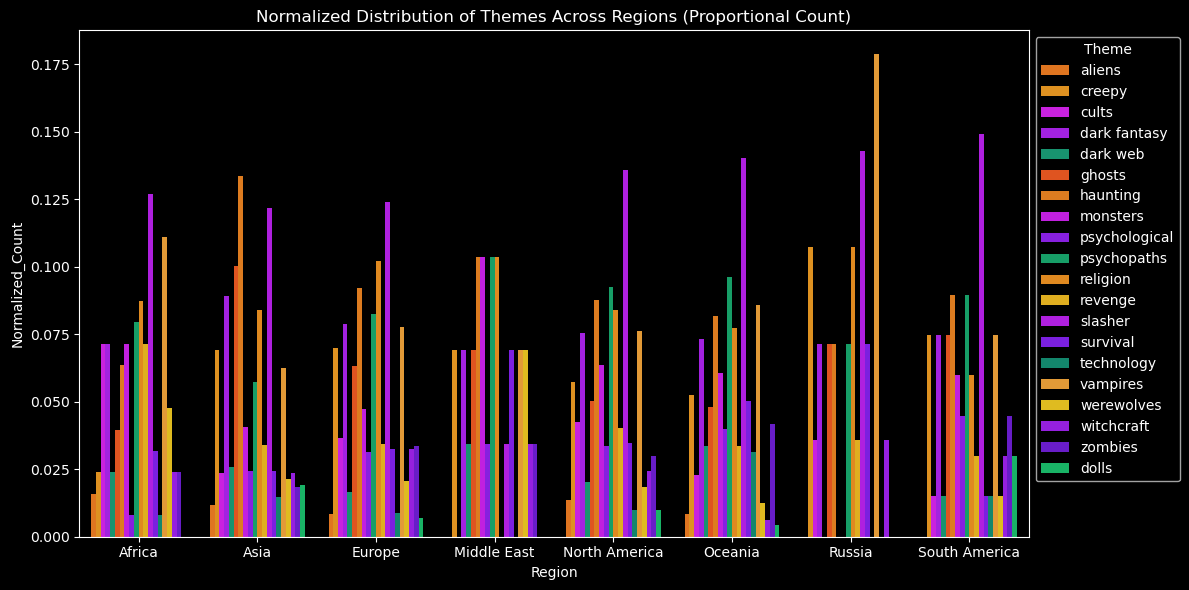

In [40]:
plot_themes_per_region(merged_df)

Normalized theme distribution per country

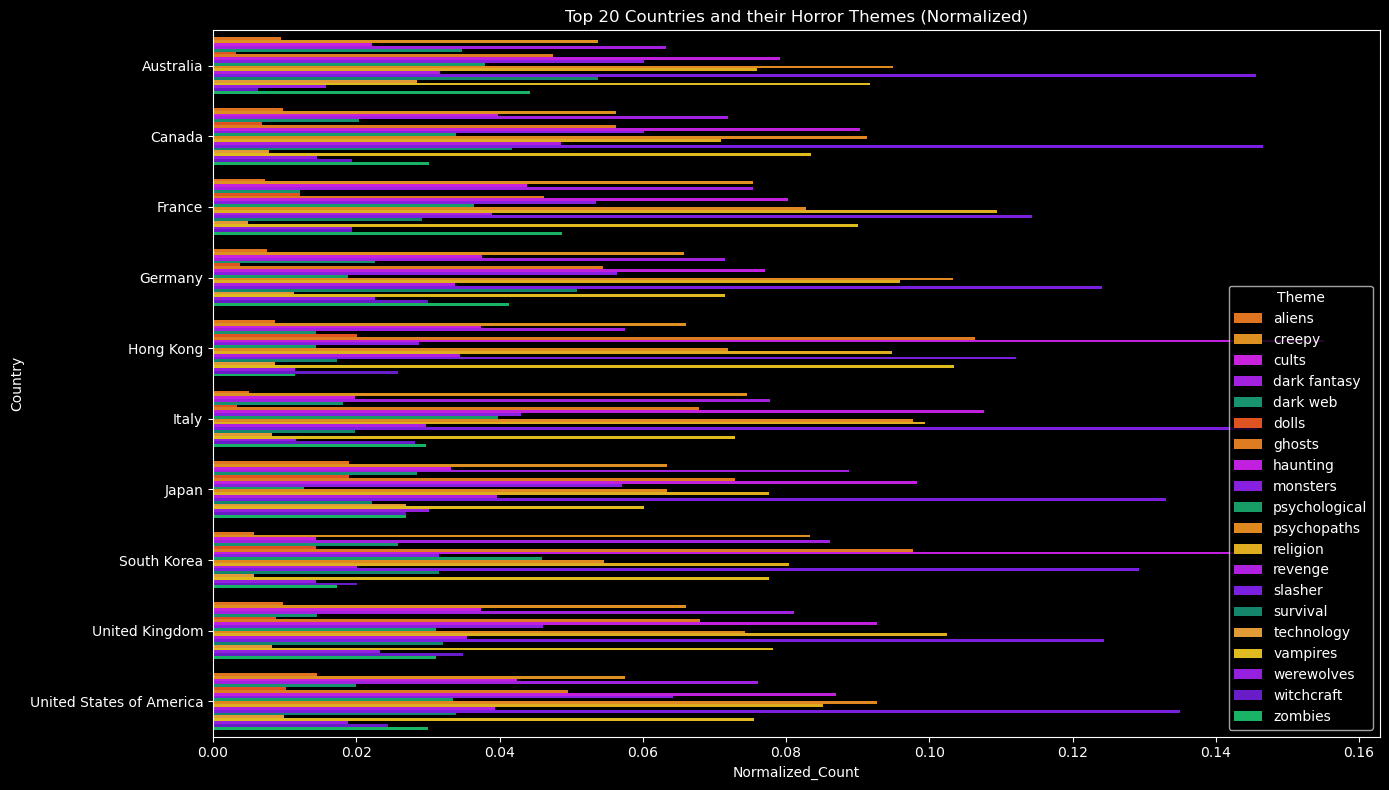

In [41]:
plot_normalized_themes_per_region(merged_df)

Heatmap visualization

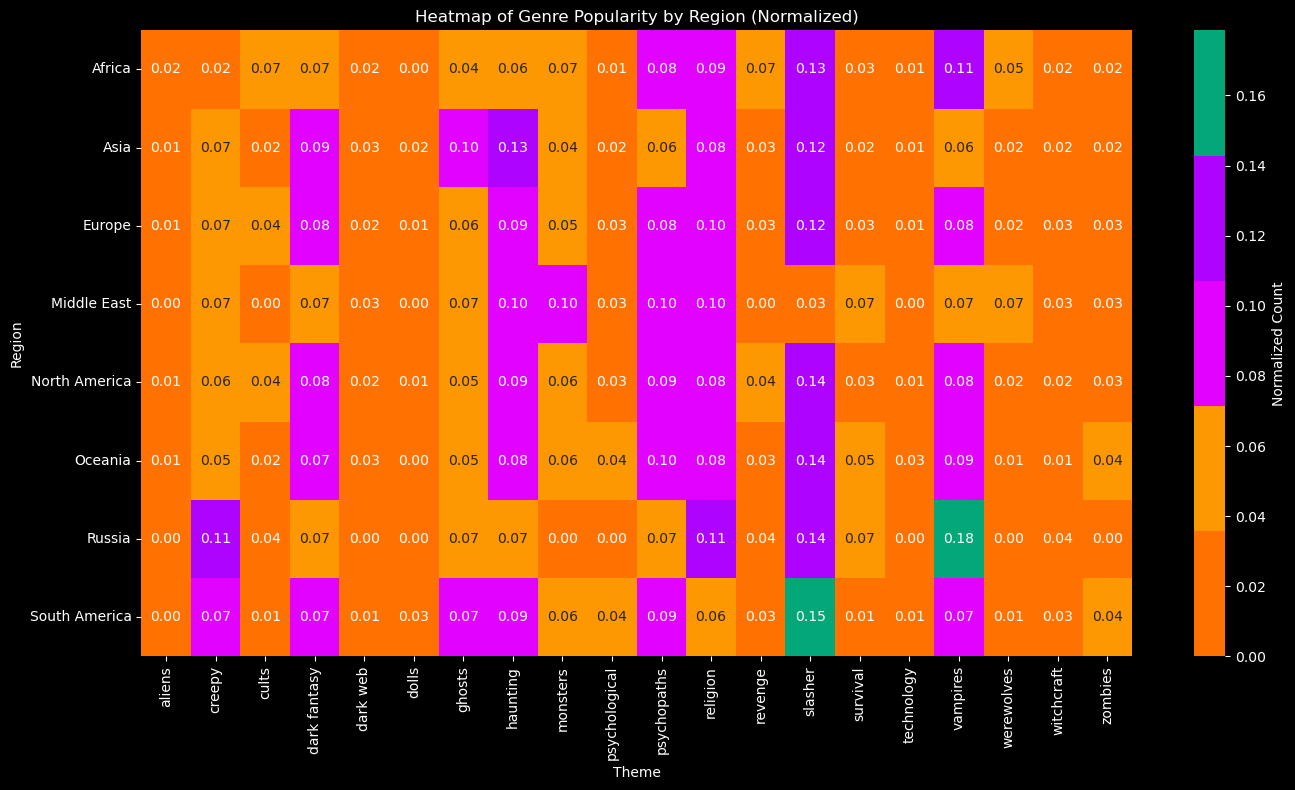

In [42]:
plot_genres_popularity_heatmap(merged_df)

Top Themes in Each Region

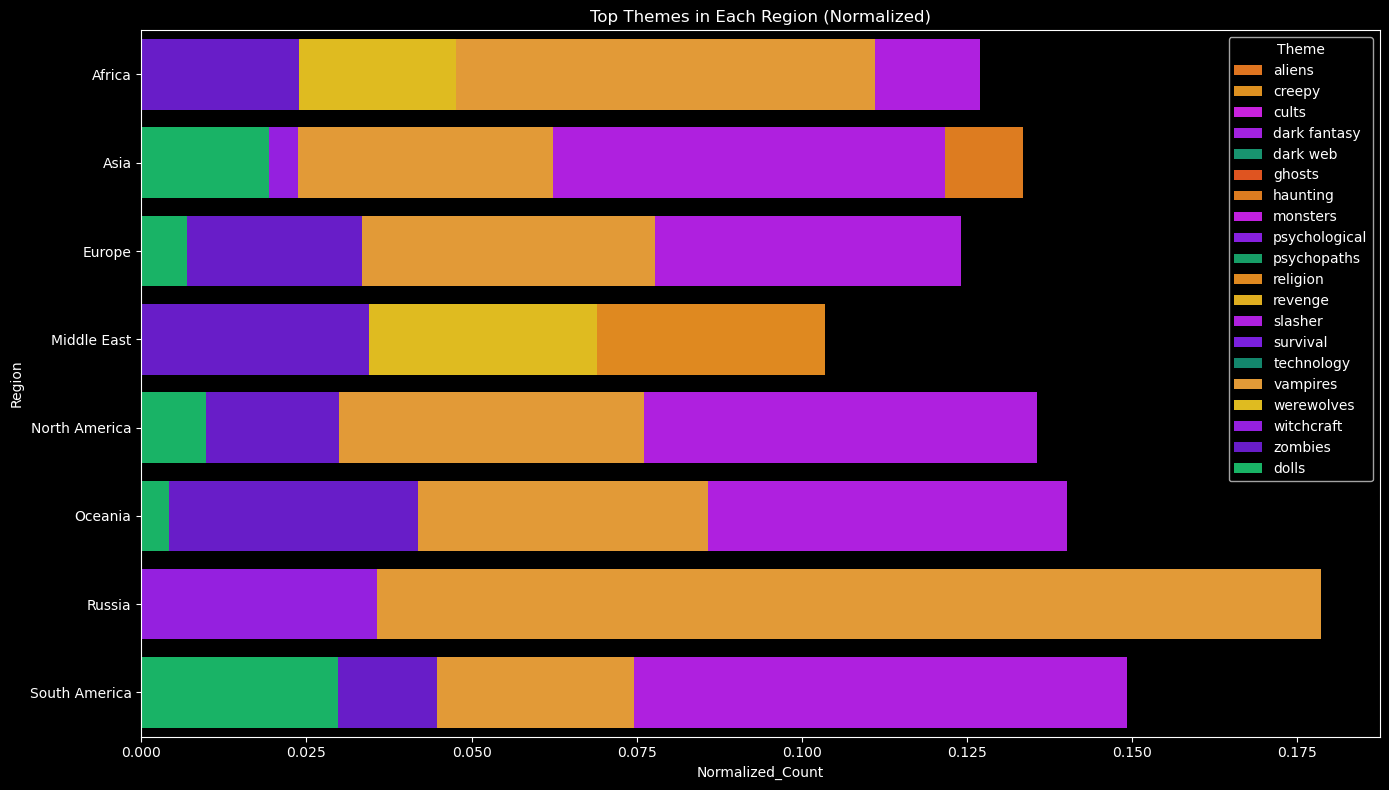

In [43]:
plot_top_themes_per_region(merged_df)

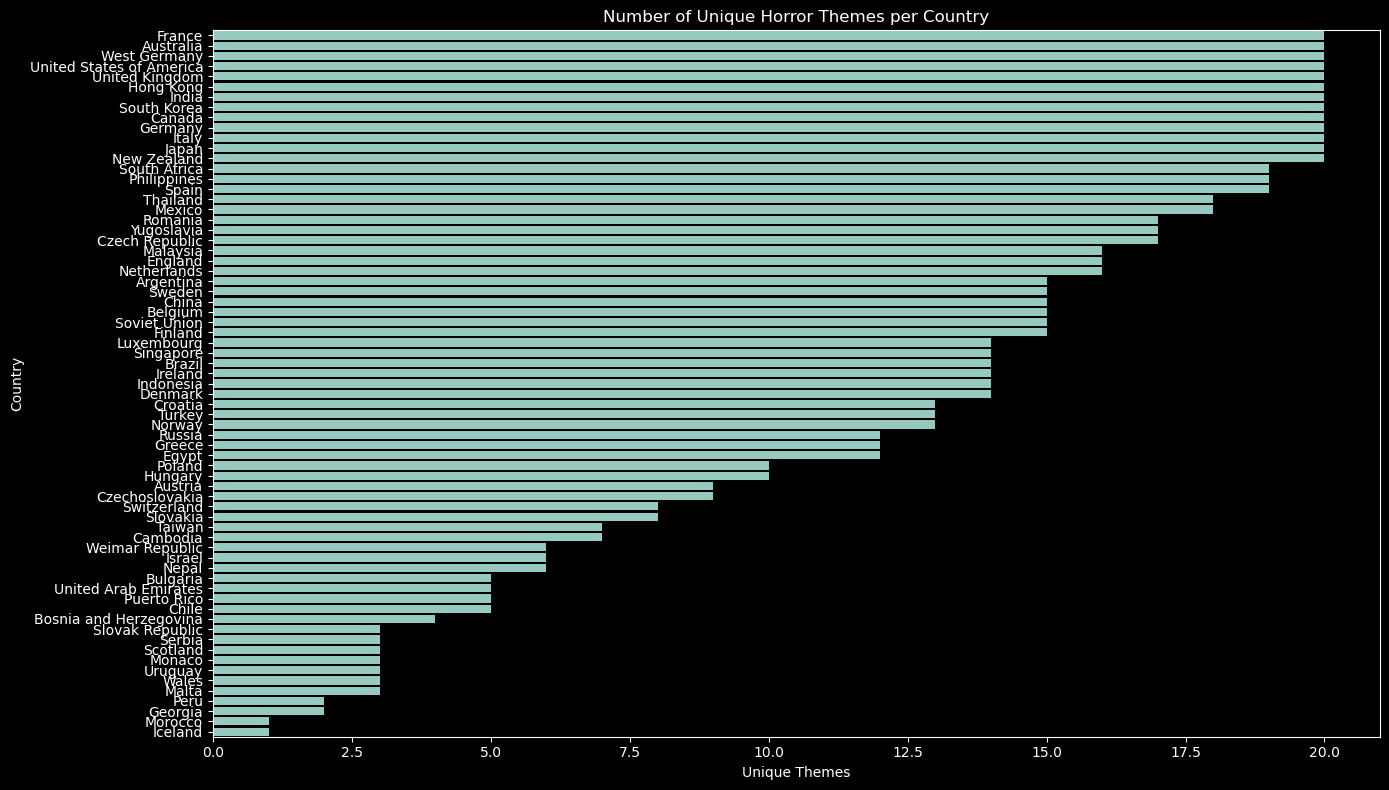

In [44]:
plot_unique_themes_counts_per_region(merged_df)

## 2.6 Historical

The goal of this part is to study the influence of historical events on the horror movie industry. Various topic will be analyzed.

For each of the topics that will be studied, we are going to ask chat-GPT for a list of simple and single word related to the topic. An average vector will represent the topic. We will iterate over every movies of the datatset to estimate the similarity between the topic and the summaries of the horror movies. Based on a threshold, we will determine if a movie contains or not a specific topic in its summary. A plot of the evolution of the occurence of the topic-related movies over the years will be plotted. We are going to ask chat-gpt to give use the years for which some worldwide events took place with regard of this topic.

The change in the occurence of the topic related movies of these years will tested statistically and evaluated with a significative value. We will discuss the accuracy of the method and the results.

In [44]:
### Write summaries in a txt file to generate a model [this code is used to train the model]
#with open("Summaries_without_ID.txt", 'w') as f:
#    for _, row in df_hist.iterrows():
#        # Write each line in the format: new ID followed by the summary
#        f.write(f"\t{row['Summary']}\n")

# Train the model without any labeled data
#model = fasttext.train_unsupervised("Summaries_without_ID.txt")

In [45]:
# Apply function
merge_files("unsupervised_model_reconstructed.bin", "part_")
# Load model
model = fasttext.load_model("unsupervised_model_reconstructed.bin")

NameError: name 'fasttext' is not defined

### Consideration for the use of chat-GPT

The search in keywords in chat-GPT was done the following way: 

" This is my code:

[code of the application of the function `calculate_similarity`]
[code of the `model` training]
[code of function `analyze_similarity`]
[code of the application of the function `analyze_similarity`]

By using this function, I'm looking to search for a see if there is a dependance between a lexical field of a subject found in the summary of some horror movies and some historical events linked to this subject that have taken place in the world. To do so, I evaluate the p_value from the Mann-Whitney U Test to see if the difference in cosine similarity is significative.

What I need you to do is to create a python list of at least 40 single (1 word only) words (called '[insert subject]_keywords') that are in the lexical field of the of the following subject: petrol crisis. Some of the word should have the same root as the subject and some not. This corresponds to the variable 'subject_keywords' in my code

After I want you to give me a python dictionary (called '[insert subject]_events') that give the main year and name of events linked to the subject given beforehand. Give 3 to 7 events, between 1960 and 2020, according to the importance of them. Give them in a chronological order. This corresponds to the variable 'subject_events' in my code'. "

Consideration:
- We have chosen not to search for historical events before 1960, because there wasn't enough movie available so a small change might be significative when it shouldn't, and after 2020 because there was not enough time in year to search for a change after an event.
- We have chosen to take at least 40 word because the test that where run on list of a size of 15 words weren't as conclusive as the one with a larger size.
- We have chosen to add as input the code (function and model training) that we use because we though that it might help the AI to gather so keyword that are more significant.
- The range of number historical events was determined as optimal when running the code with different values and showed that having too much events overload the graph and include too many non meanningfull events.

### Terrorism

In the following part, we are going to focus on the occurrance of terrorism-related word in the summaries of the horror data frame.

In [ ]:
terrorism_vector = get_average_vector(terrorism_keywords, model)
# Apply similarity check to each summary
df_hist['Terrorism_similarity'] = df_hist['Summary'].apply(lambda x: calculate_similarity(x, terrorism_vector, model))

In [ ]:
analyze_similarity(df_hist, similarity_col='Terrorism_similarity', events=terrorism_events, threshold=0.86)

For a threshold of 0.86, there are three events that are statistically significant at 10%. Nevertheless, we would have exepected the 9/11 event to be at least significative at 5% due to the importance of the number of victimes. The Madrid train bombing and the ChristChruch shooting show significant result at 10%. It can be observed that each event presents a peak in the proportion of horror movies that show a higher similarity than the threshold, with the terrorism lexical field, the year after the event. Terrorism related events seem to influence  the word used in a summary of the horror movies. 

### Pandemics & Epidemics

In [ ]:
# Generate subject vector
flu_vector = get_average_vector(flu_keywords, model)
# Apply similarity check to each summary
df_hist['Flu_similarity'] = df_hist['Summary'].apply(lambda x: calculate_similarity(x, flu_vector, model))

In [ ]:
analyze_similarity(df_hist, similarity_col='Flu_similarity', events=flu_events, threshold=0.81)

For a threshold of 0.81, there is only one significative year at 5% which corresponds to the swine flu pandemic in 2009. This flu outbreak is the third recent flu pandemic involving the H1N1 virus. The number of cases including asymptomatic and mild cases could be 700 million to 1.4 billion people, more or less 11% to 21% of the global population. The second flu outbreak involving the same virus, the Russian flu pandemic in 1977, which mostly affected a population younger than 25, also shows significant results at 10%. 

We would have expected the COVID 19 pandemic from 2020 to be significative because it is the second deadliest pandemic since 1960. Note that when choosing a lower threshold, this events become significative. Note that the deadliest pandemic, the HIV/AIDS pandemic, was not represented on the plot because it has not stopped spreading since 1960s, which could explain the occasional peaks over time (noise). 

### Petrol crisis

In [ ]:
petrol_vector = get_average_vector(petrol_keywords, model)
# Apply similarity check to each summary
df_hist['Petrol_similarity'] = df_hist['Summary'].apply(lambda x: calculate_similarity(x, petrol_vector, model))

In [ ]:
analyze_similarity(df_hist, similarity_col='Petrol_similarity', events=petrol_events, threshold=0.86)

For a threshold of 0.86, the global financial crisis in 2008, the COVID 19 pandemic impact on oil in 2020 and the 1st oil crisis in 1973 are all described by a significant p_value at 10%, while there is only one event that is significant at 5%: the Gulf War 1990. In 1990, Iraq's invasion of Kuwait led to a sharp increase in oil prices due to disrupted supply, causing economic uncertainty and influencing various industries, including the entertainment sector. Historically, over the year 2006, 2007 and 2008, the price of a barel increased slowly until reaching a value of the $147 July 2008, before a sharp decrease to reach a value of $32 in December of the same year, as we can see on the plot. It is interesting to note that 2008 is the only period, between 1995 and 2020, which show a decrease in the total number of horror movies. This is also a consequence of the global economic crisis because of declining consumer spending, reduced financing, and changes in audience behavior. Coming back to petrol crisis, in 1973, the Organization of Arab Petroleum Exporting Countries (OAPEC) imposed an embargo on nations supporting Israel during the Yom Kippur War, including the U.S., Japan, and several European countries. In consequence, the price of the barrel rose by 300%. Thus, we can see that the most important petrol crisis had an influence on the words used in  movies horror summaries.

### Communism

In [ ]:
communism_vector = get_average_vector(communism_keywords, model)
# Apply similarity check to each summary
df_hist['Communism_similarity'] = df_hist['Summary'].apply(lambda x: calculate_similarity(x, communism_vector, model))

In [ ]:
analyze_similarity(df_hist, similarity_col='Communism_similarity', events=communism_events, threshold=0.87)

For a threshold equal to 0.87, the fall of the Berlin wall in 1989 is the only significant event, with the highest peak over the entire time period, appearing two years after, in 1991. This corresponds quite well to the minimum time before the release of a movie after some event that is not a sudden change (like crisis or terrorist attacks). Note the presence of a large peak in 1995 that might correspond to the influence of the end of the soviet union form 1991. Here, we can see that the most symbolic communist related events of the last 60 years has a direct influence on the lexical fields used to describe the summary of horror movies at this period. Overall, we can observe that since the maximum peak in 1991, consequence of the fall of Berlin wall and the end of soviet union, the proportion of horror movies that show similarity with the communism lexical field has decrease slowly, proof of the end of the fear of communism in a capitalistic world.

### Nuclear

In [ ]:
nuclear_vector = get_average_vector(nuclear_keywords, model)

# Apply similarity check to each summary
df_hist['Nuclear_similarity'] = df_hist['Summary'].apply(lambda x: calculate_similarity(x, nuclear_vector, model))

In [ ]:
analyze_similarity(df_hist, similarity_col='Nuclear_similarity', events=nuclear_events, threshold=0.84)

For a threshold of 0.84, it seems like we have two significant events: the Chernobyl nuclear disaster in 1986 and the cessation of soviet testing in 1991. Nevertheless, the  statistical test in 1986 is based on a decrease in the proportion of movies summaries influenced by the subject which is not really coherent with the real events, which we would expect to show an increase. We would not have expected the cessation of soviet testing to be significative since it is not a very outsanding event in our mind. We should not forget that the major number of movies are produced in the United States of America which are directly impacted by the end of the soviet union and this cessation, thus explained this peak.

### Limits of the historical analysis

We have found ourselves limited by the fact that we have to choose the threshold of acceptability of a movie summary in a topic. A low threshold introduces a high number of movies that are not really related to the lexical field of the topic, whereas a high threshold restrains the number of movies that are not really related to the lexical field of the topic but implies not considering the influence of less famous historical events. 

We have tried not using a threshold and using the mean cosine similarity per year directly ofr the statistical test. Accounting the fact that each year there are only a few movies that are related to the lexical field of a subject, a problem arised from the use of the mean value per year. Indeed, whatever the subject studied, the evolution of the mean cosine similarity per year was very similar. The high values of cosine similarity at some dates are diluted among all the other values so have not such an important influence.

The other problem that was encontered was the choice of range of research for a minimum and a maximum proportion of movie influenced by a topic. If we take a large range, the probability a introducing an error in very high but if we take a too short range, we will miss a potential change and lose the significance. I would have been interesting to introduce a range that changes for each type of event. For a punctual and shocking event (like crisis), we choose a small searching range whereas for an event spread over time (like cold war), we choose a larger searching range. 

We should take into account the fact that we neglected the presence of noise during our interpretation. For example, on the flu topic, it might be possible that the HIV/AIDS virus, which is still spreading, affects the results of the test that we run on specific historical events. 

## 2.7 Titles

In [45]:
# for each movie, only keep the first actor
Horror_movies_with_first_actor = Horror_movies_with_actors.drop_duplicates(subset=['Name', 'Release_year'], keep='first')

In [46]:
# Remove abnormal characters in titles
Horror_movies_with_actors['Name'] = Horror_movies_with_actors['Name'].apply(clean_movie_title)

### 1. Analyse work occurences in titles throughout the decades

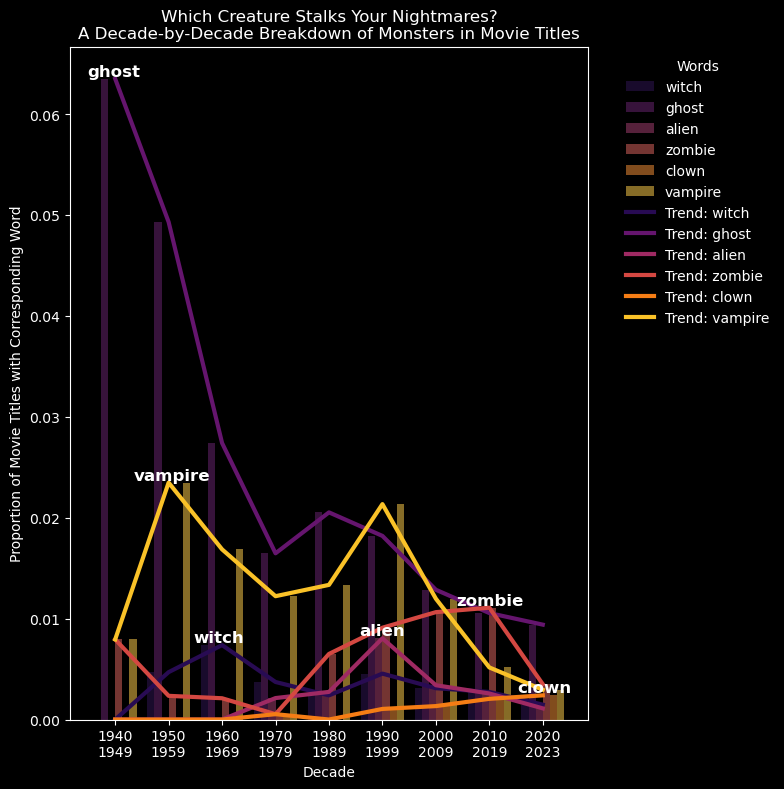

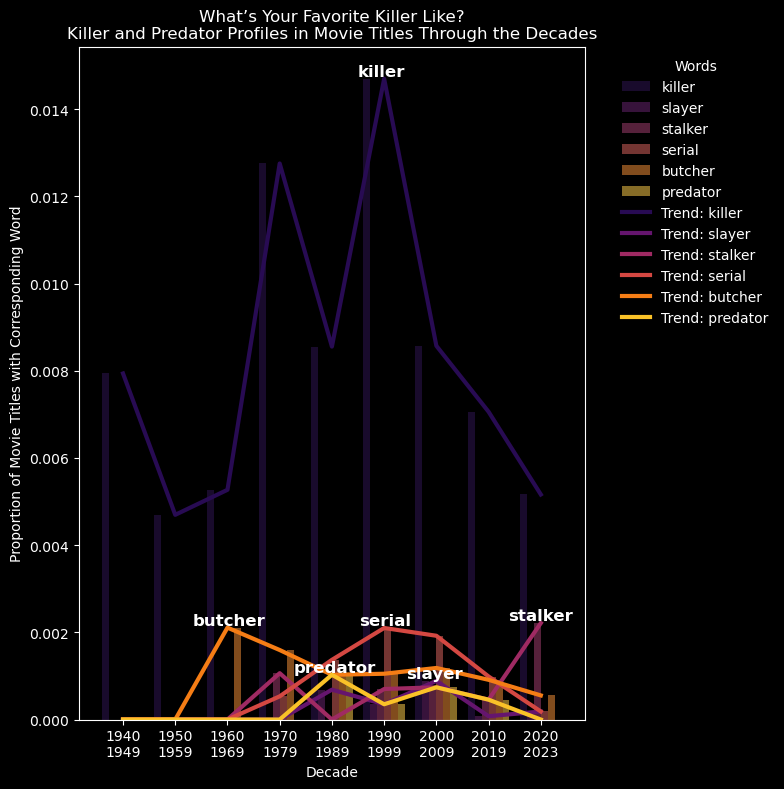

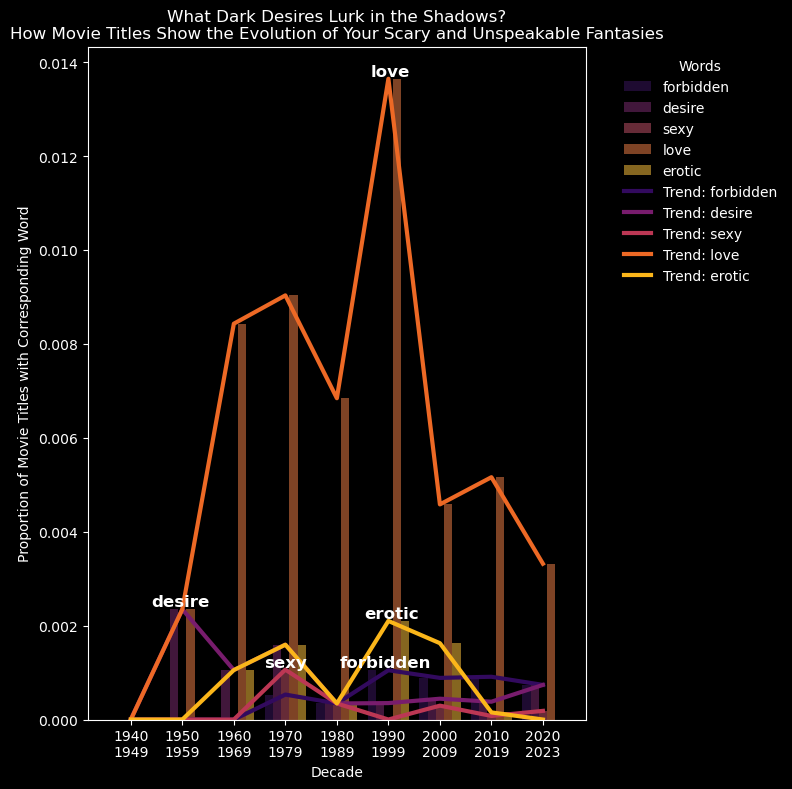

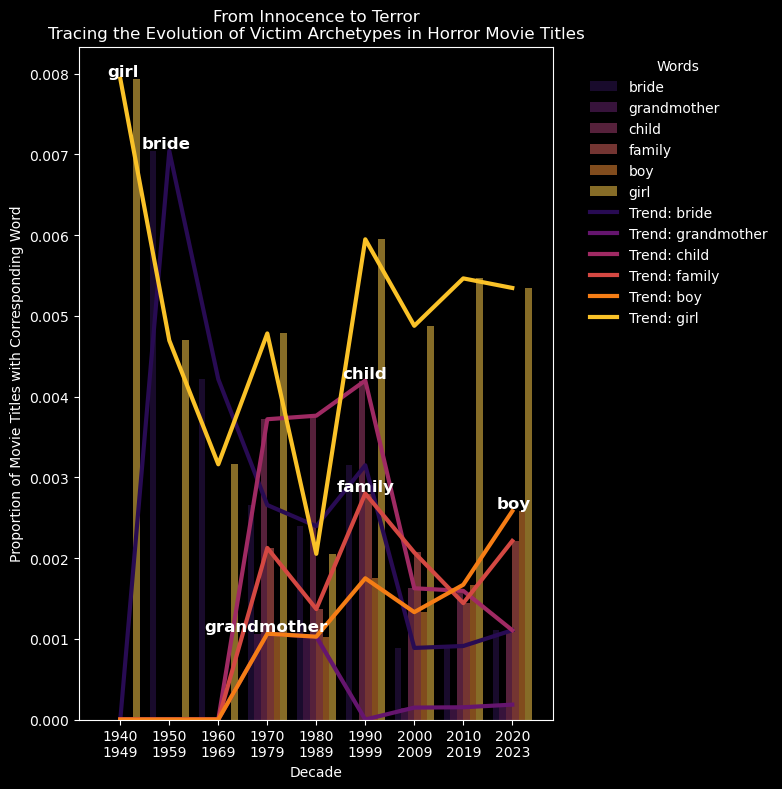

In [47]:
# which creatures scare people?
analyze_word_proportions_with_highlights(Horror_movies, ['witch', 'ghost', 'alien', 'zombie', 'clown', 'vampire'], time_intervals, custom_palette='inferno', show_lines=True, chart_title="Which Creature Stalks Your Nightmares?\nA Decade-by-Decade Breakdown of Monsters in Movie Titles")
# words describing the different types of killers
analyze_word_proportions_with_highlights(Horror_movies, ['killer','slayer', 'stalker', 'serial', 'butcher', 'predator'], time_intervals, custom_palette="inferno", show_lines=True, chart_title='What’s Your Favorite Killer Like?\nKiller and Predator Profiles in Movie Titles Through the Decades')
# dark and forbidden fantasies 
analyze_word_proportions_with_highlights(Horror_movies, ['forbidden', 'desire', 'sexy', 'love', 'erotic'], time_intervals, custom_palette="inferno", show_lines=True, chart_title='What Dark Desires Lurk in the Shadows?\nHow Movie Titles Show the Evolution of Your Scary and Unspeakable Fantasies')
# words for the victims/preys
analyze_word_proportions_with_highlights(Horror_movies, ['bride', 'grandmother', 'child', 'family', 'boy', 'girl'], time_intervals, custom_palette="inferno", show_lines=True, chart_title='From Innocence to Terror\nTracing the Evolution of Victim Archetypes in Horror Movie Titles')

### 2. Analyse which words are associated with given keywords in movie titles

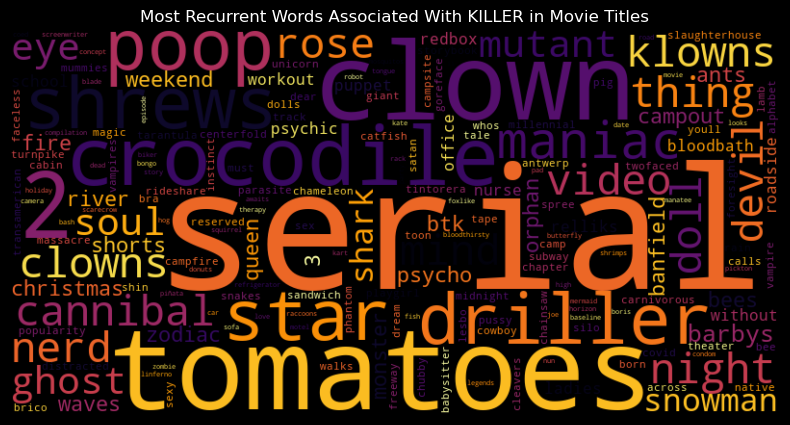

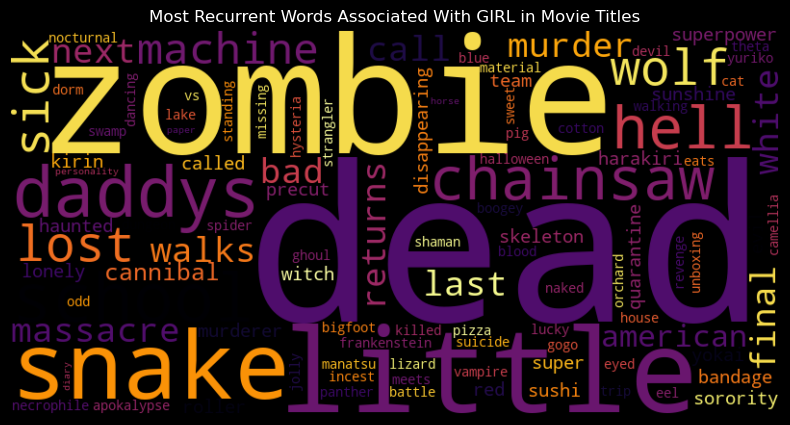

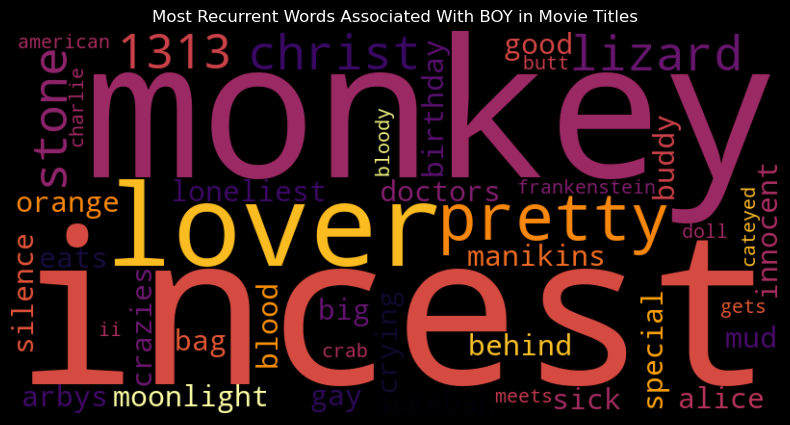

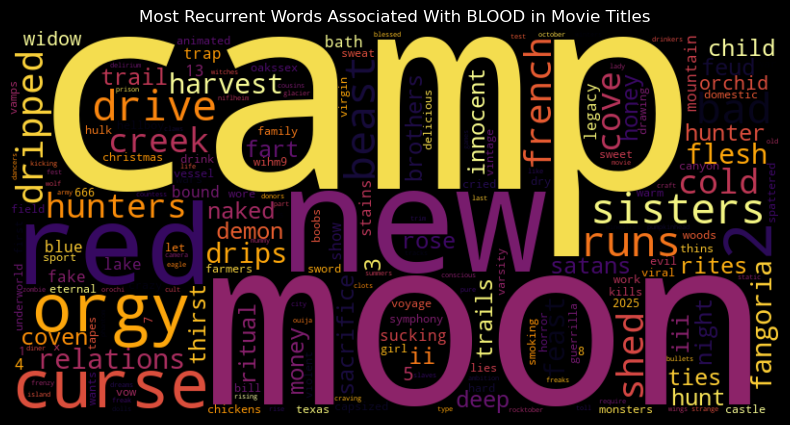

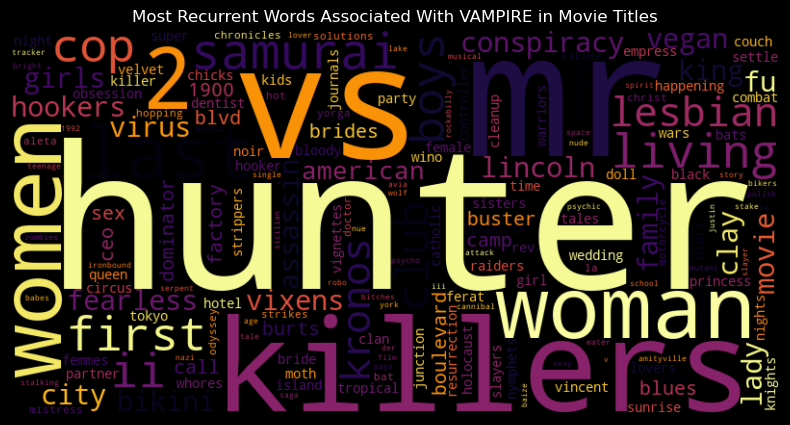

In [48]:
# look at the words associated with severaé keywords
# we chose distance=1 to have only the words just before or just after the chose keyword
analyse_association_mots(Horror_movies, 'killer', distance=1)
analyse_association_mots(Horror_movies, 'girl', distance=1)
analyse_association_mots(Horror_movies, 'boy', distance=1)
analyse_association_mots(Horror_movies, 'blood', distance=1)
analyse_association_mots(Horror_movies, 'vampire', distance=1)

### 3. Analyse actor profiles based on keyword present in movie title

In [ ]:
# call the function that filters all the movies with a given keywords
# and fills missing information about actors, their ethnicity and gender
# for several keywords
# save the processed dfs to avoid having to call the function every time
# WARNING: DO NOT RUN THIS CELL IT TAKES A VERY LONG TIME

"""
vampire_df=process_movies(Horror_movies_with_first_actor, 'vampire')
vampire_df.to_csv('data/preprocessed_data_for_titles/vampire.csv', index=False)

witch_df=process_movies(Horror_movies_with_first_actor, 'witch')
witch_df.to_csv('data/preprocessed_data_for_titles/witch.csv', index=False)

zombie_df=process_movies(Horror_movies_with_first_actor, 'zombie')
zombie_df.to_csv('data/preprocessed_data_for_titles/zombie.csv', index=False)

ghost_df=process_movies(Horror_movies_with_first_actor, 'ghost')
ghost_df.to_csv('data/preprocessed_data_for_titles/ghost.csv', index=False)

alien_df=process_movies(Horror_movies_with_first_actor, 'alien')
alien_df.to_csv('data/preprocessed_data_for_titles/alien.csv', index=False)

predator_df=process_movies(Horror_movies_with_actors, 'predator')
predator_df.to_csv('data/preprocessed_data_for_titles/predator.csv', index=False)

prey_df=process_movies(Horror_movies_with_actors, 'prey')
prey_df.to_csv('data/preprocessed_data_for_titles/prey.csv', index=False)
"""

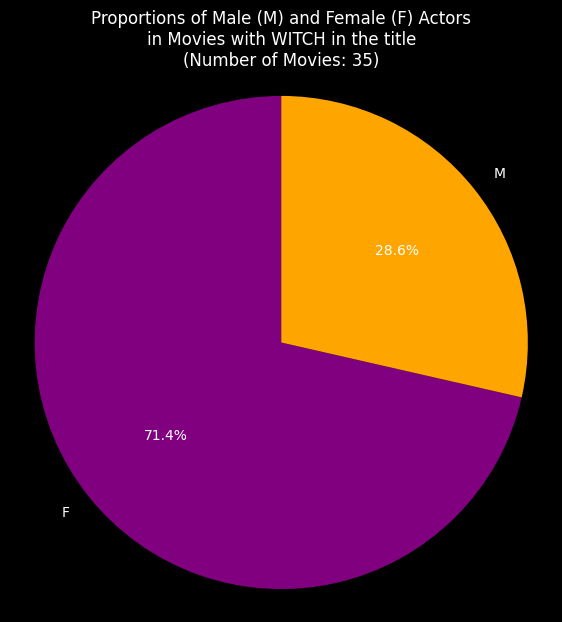

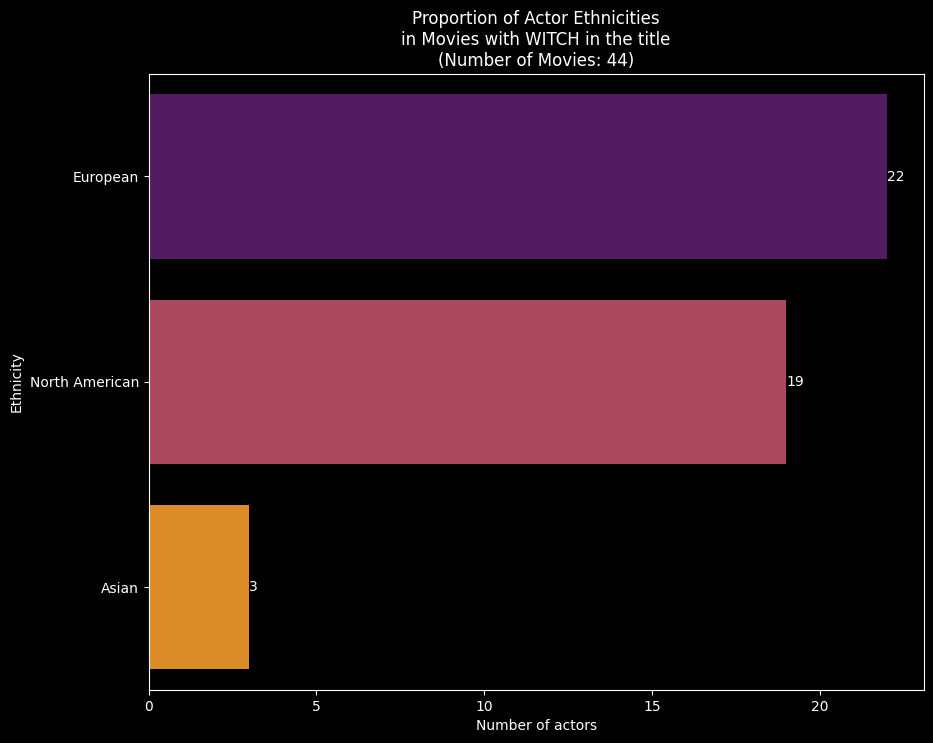

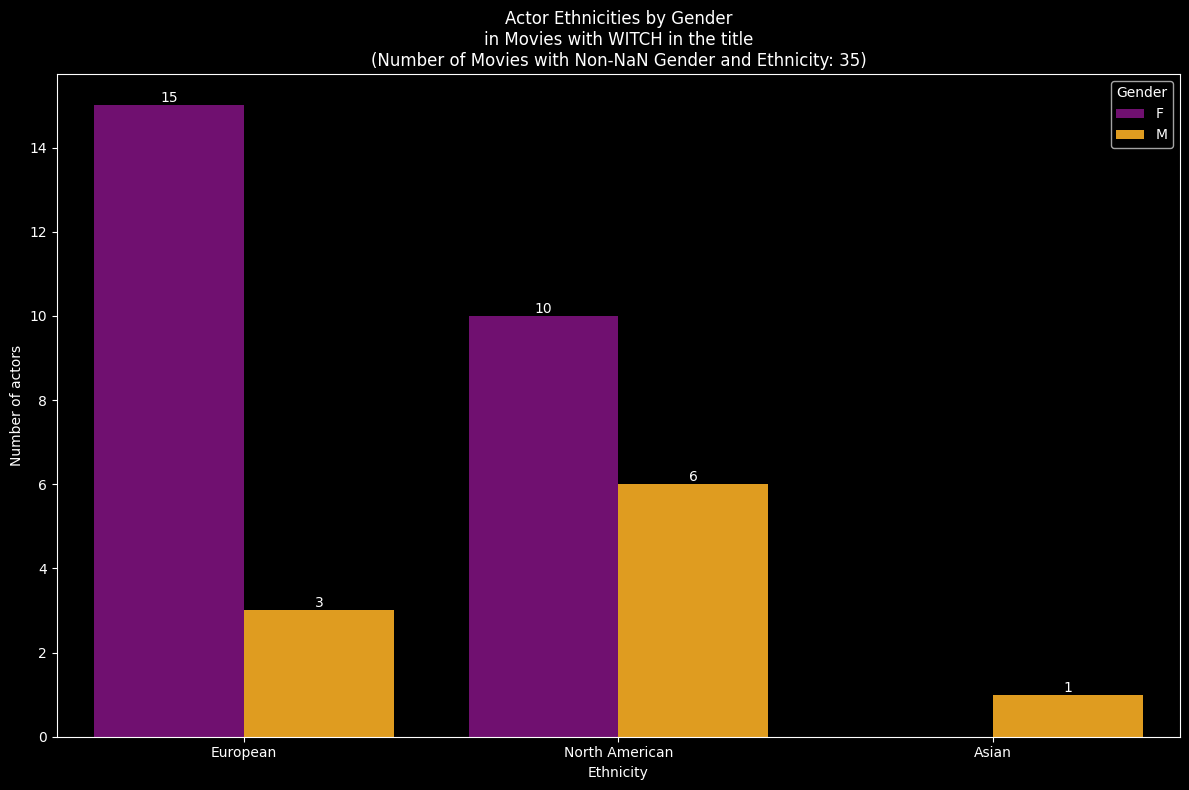

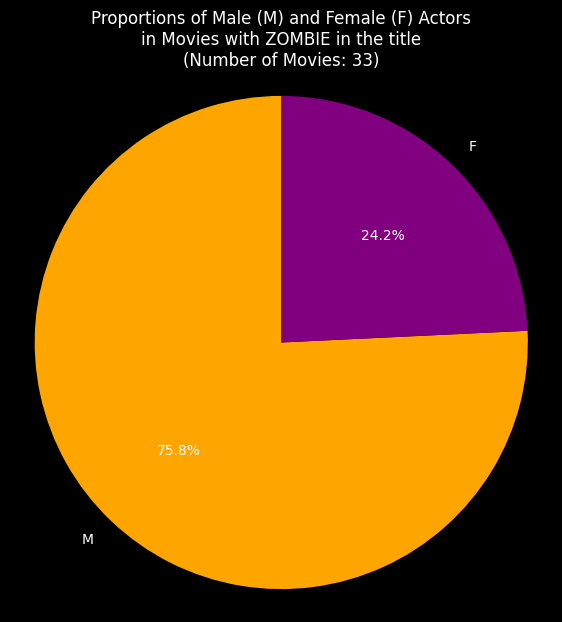

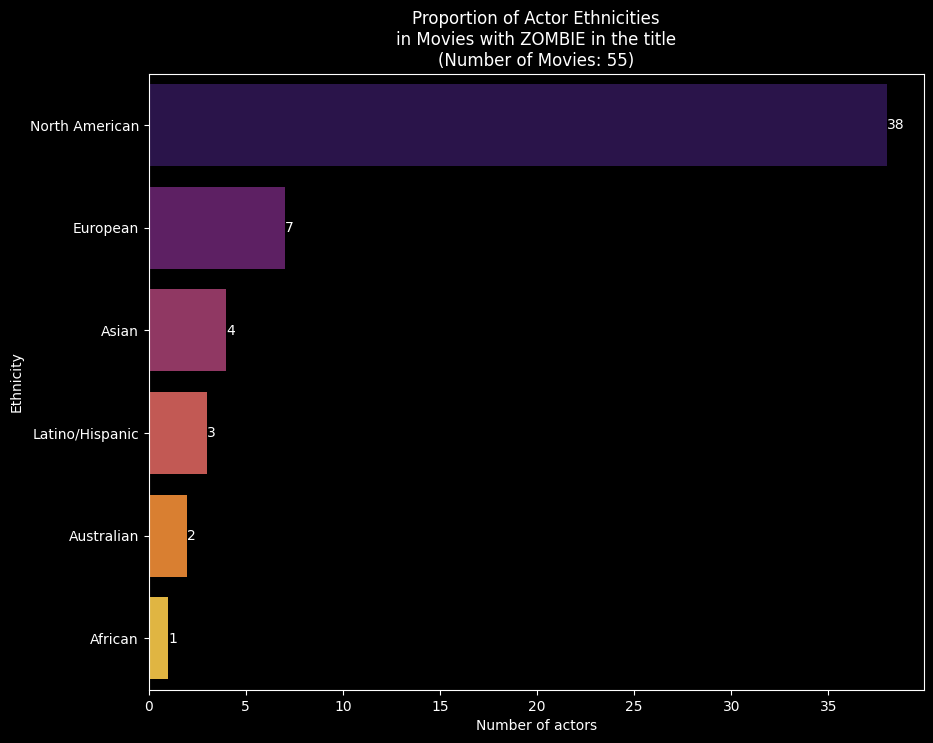

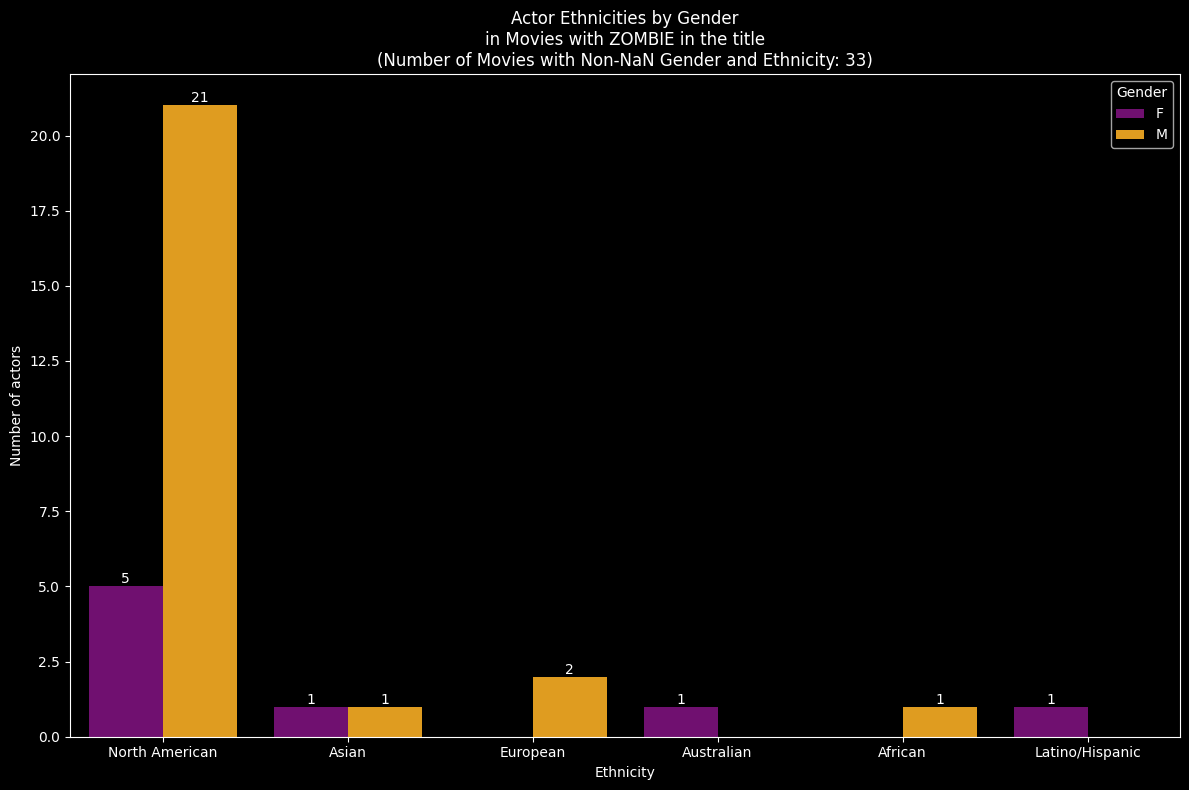

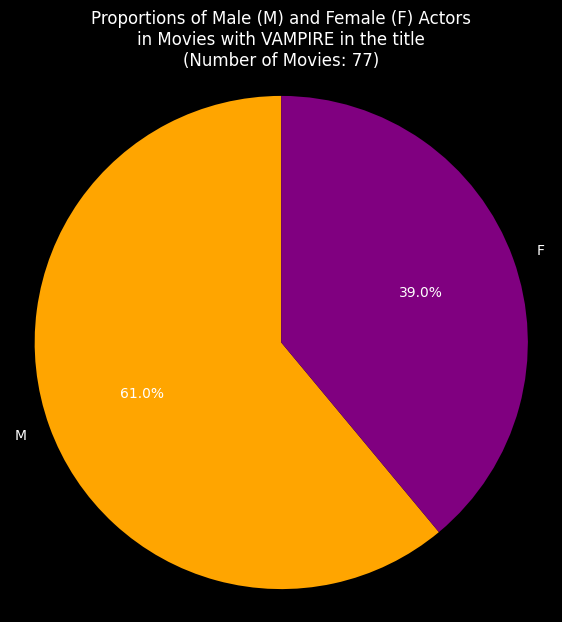

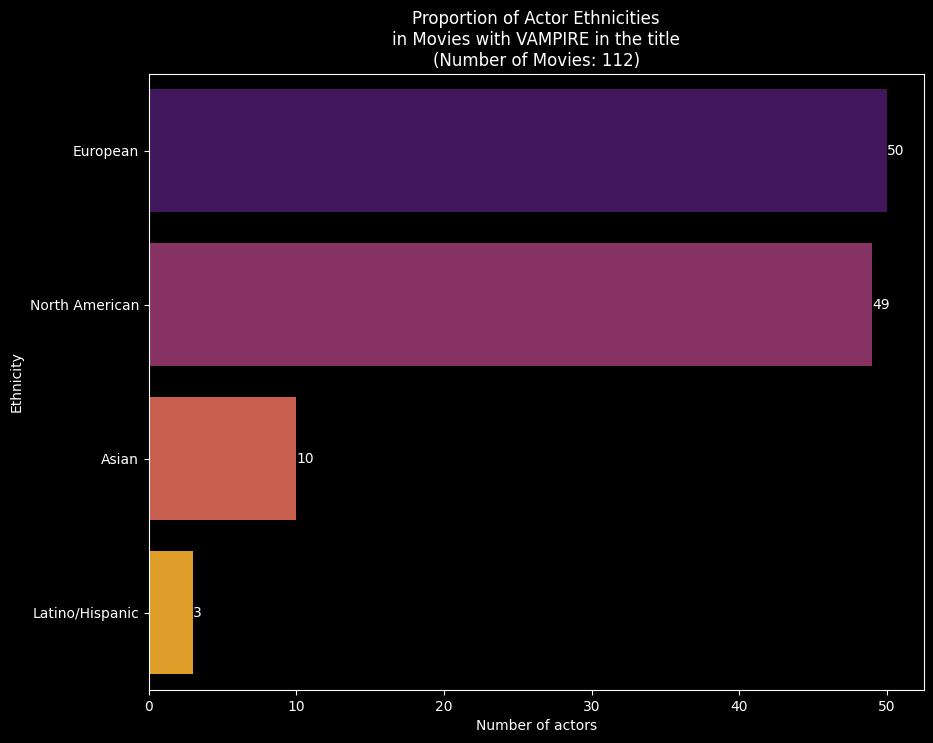

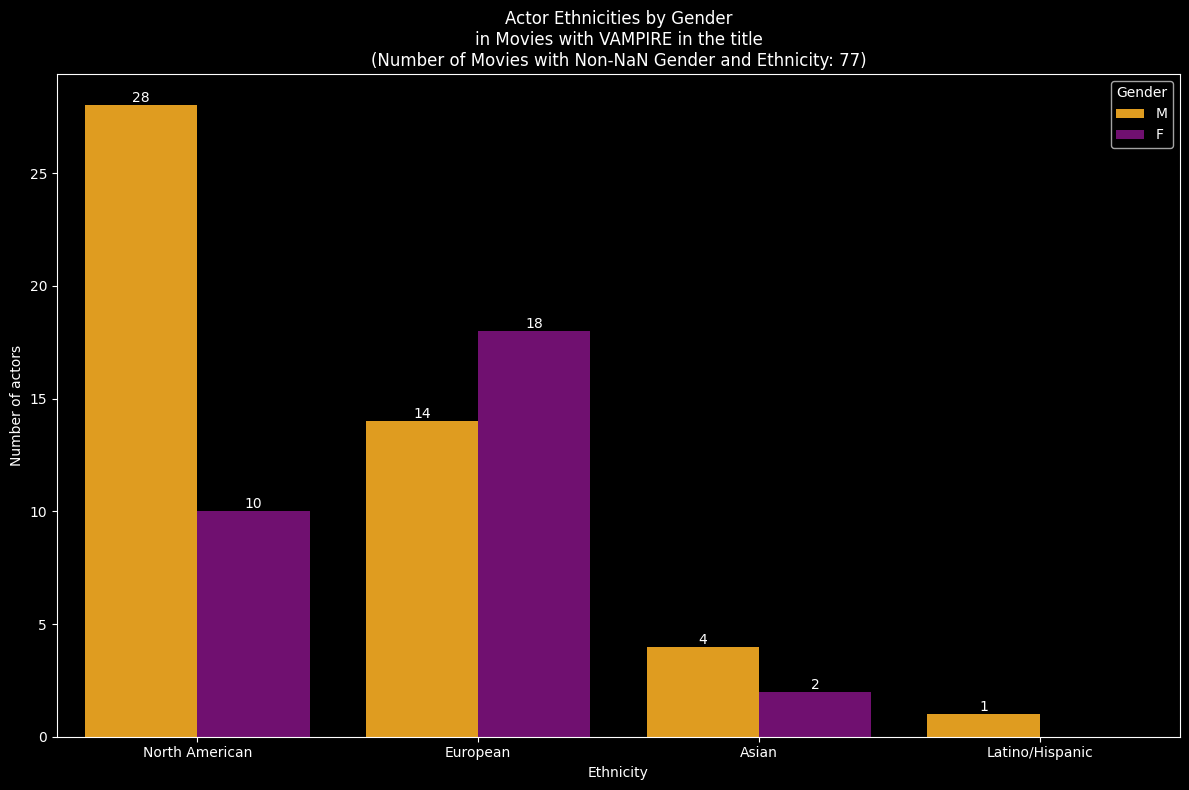

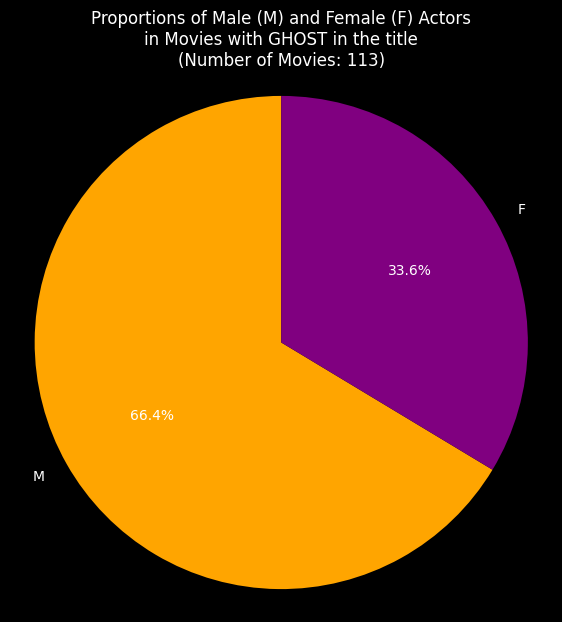

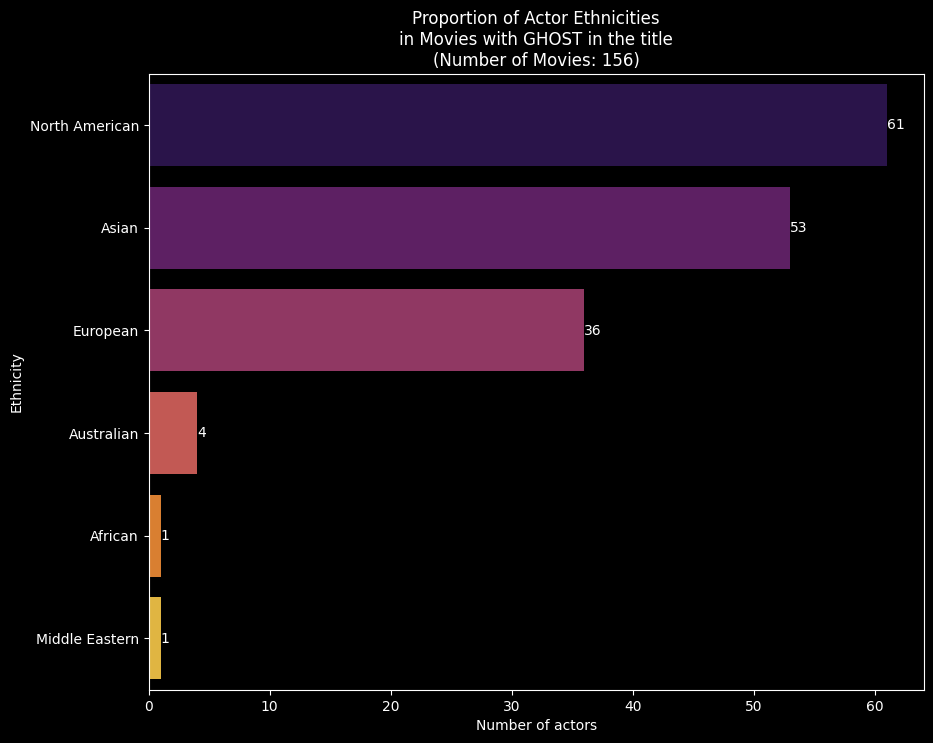

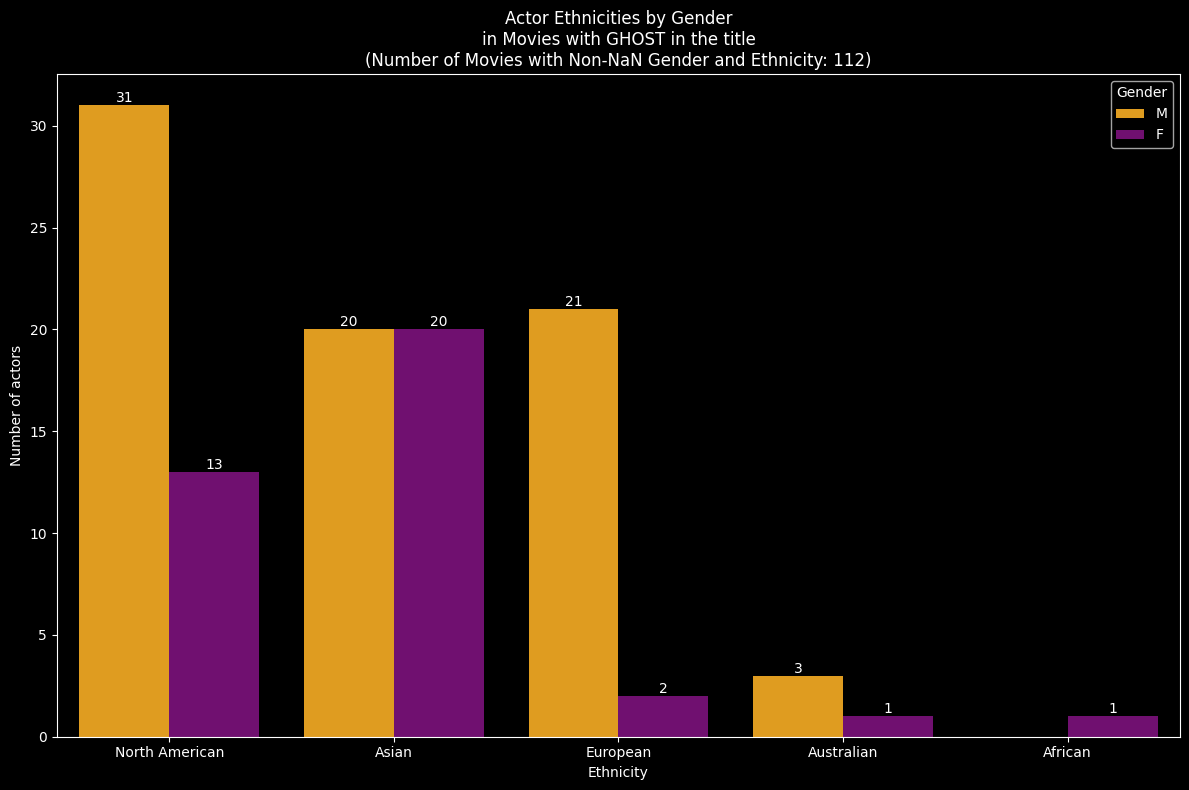

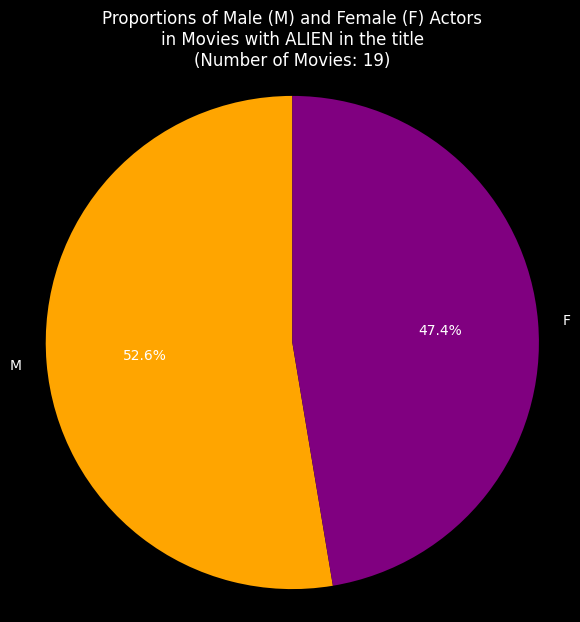

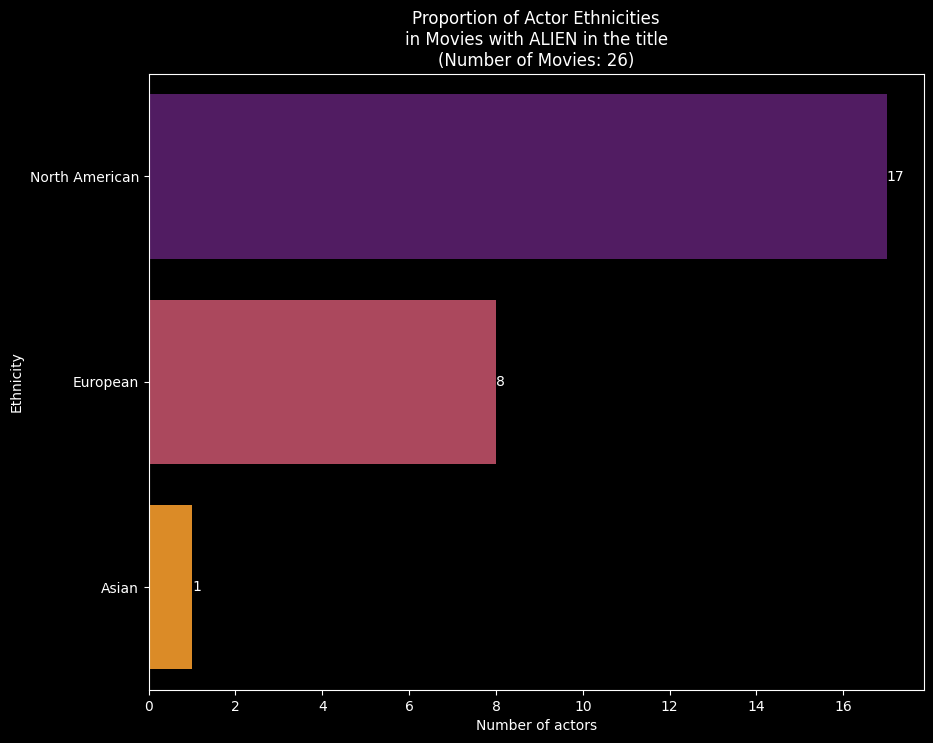

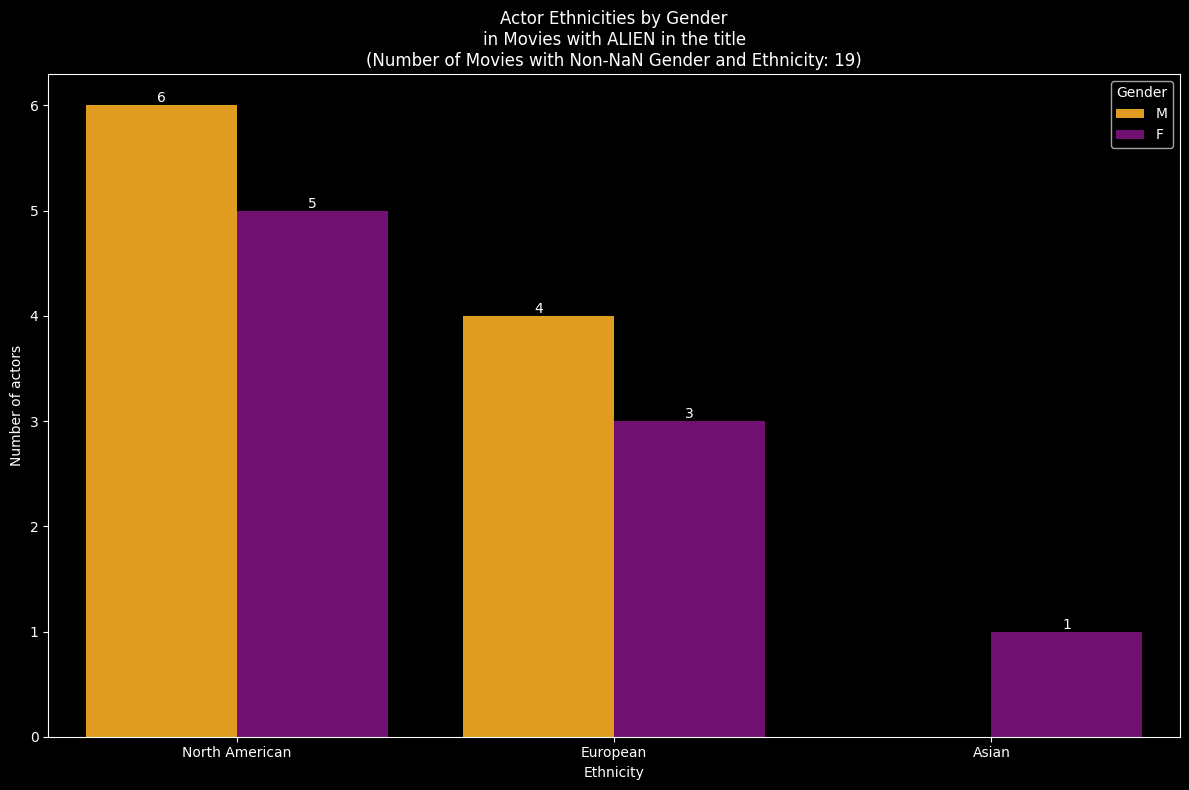

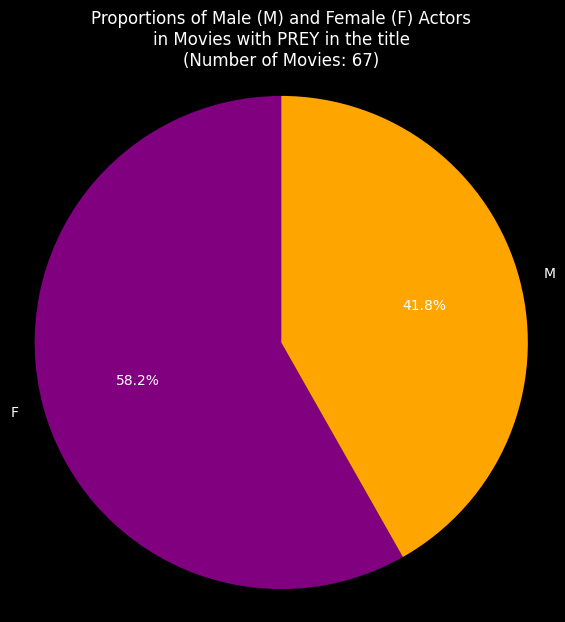

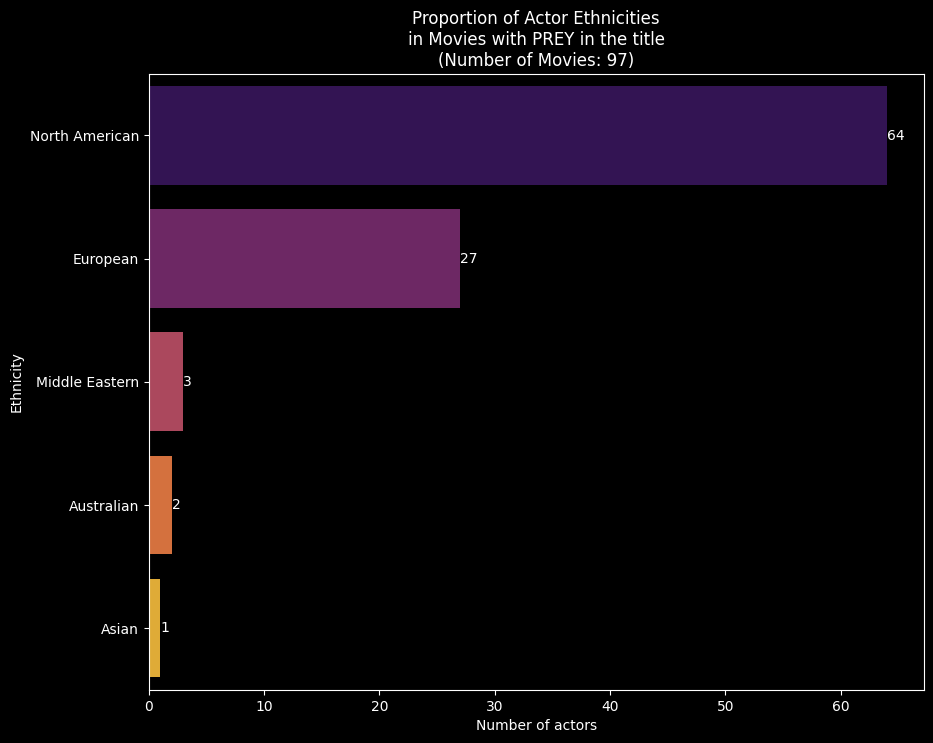

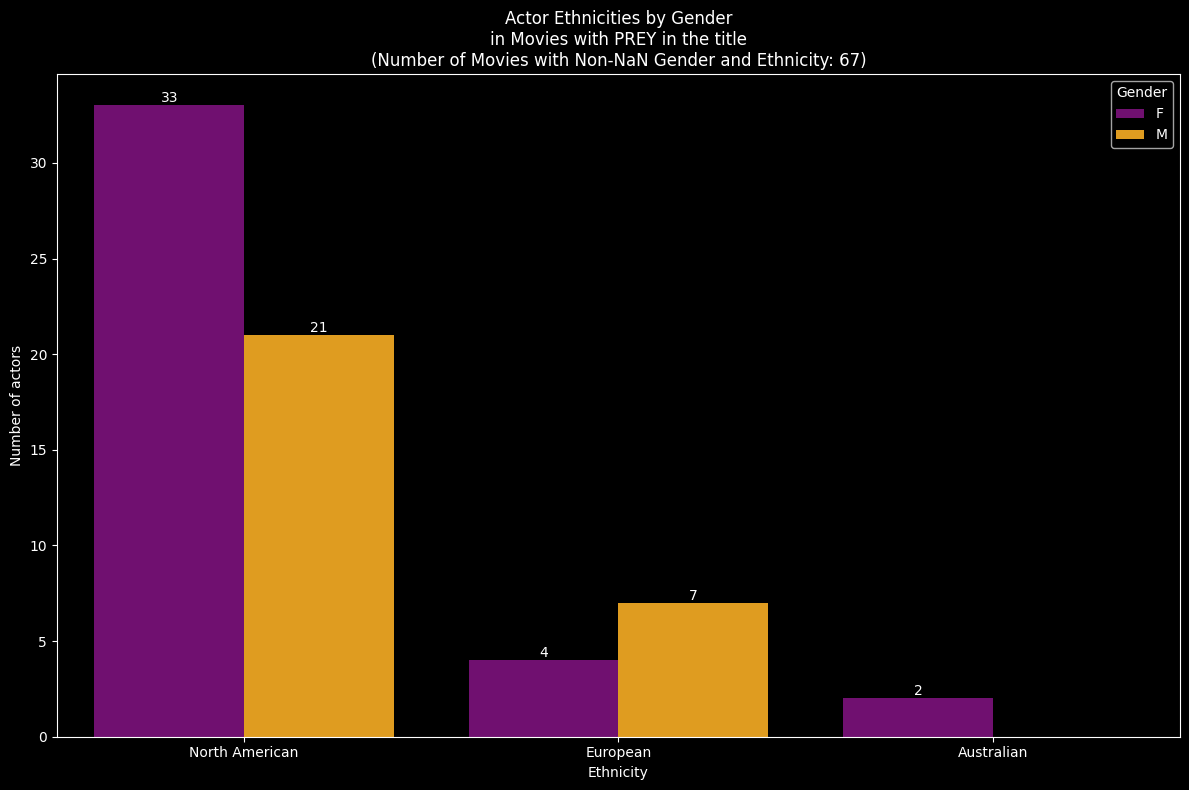

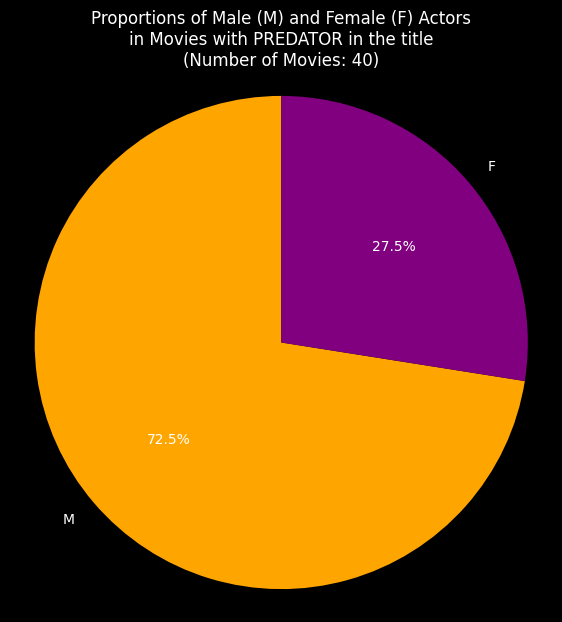

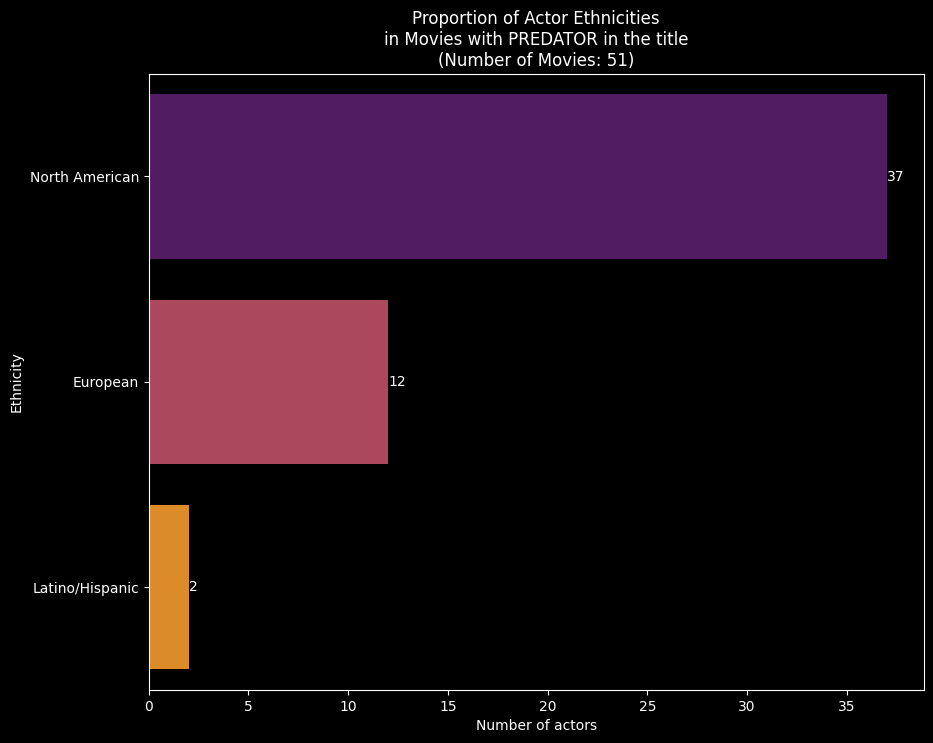

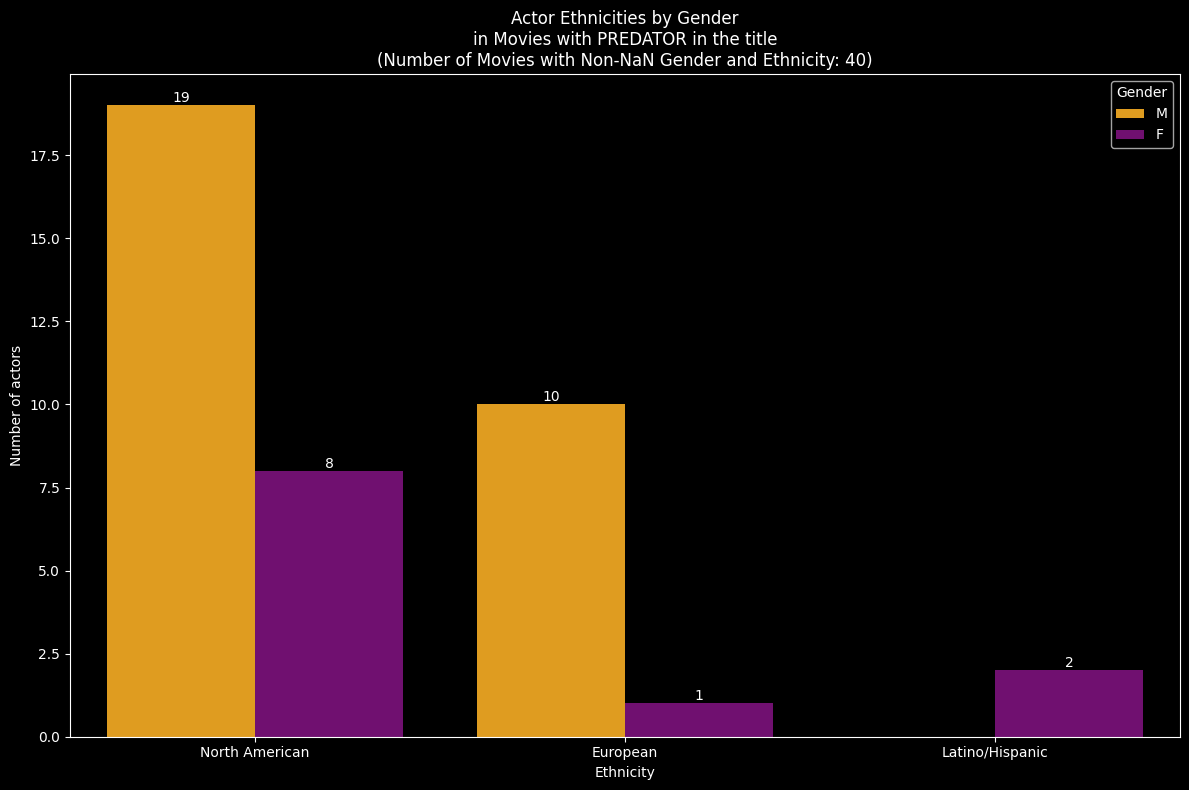

In [3]:
witch_df= pd.read_csv('data/processed_data_for_titles/witch.csv')
witch_ethnicities=plot_demographics(witch_df, 'witch')

zombie_df= pd.read_csv('data/processed_data_for_titles/zombie.csv')
zombie_ethnicities=plot_demographics(zombie_df, 'zombie')

vampire_df= pd.read_csv('data/processed_data_for_titles/vampire.csv')
vampire_ethnicities=plot_demographics(vampire_df, 'vampire')

ghost_df= pd.read_csv('data/processed_data_for_titles/ghost.csv')
ghost_ethnicities=plot_demographics(ghost_df, 'ghost')

alien_df= pd.read_csv('data/processed_data_for_titles/alien.csv')
alien_ethnicities=plot_demographics(alien_df, 'alien')

prey_df= pd.read_csv('data/processed_data_for_titles/prey.csv')
prey_ethnicities=plot_demographics(prey_df, 'prey')

predator_df= pd.read_csv('data/processed_data_for_titles/predator.csv')
predator_ethnicities=plot_demographics(predator_df, 'predator')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\julie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


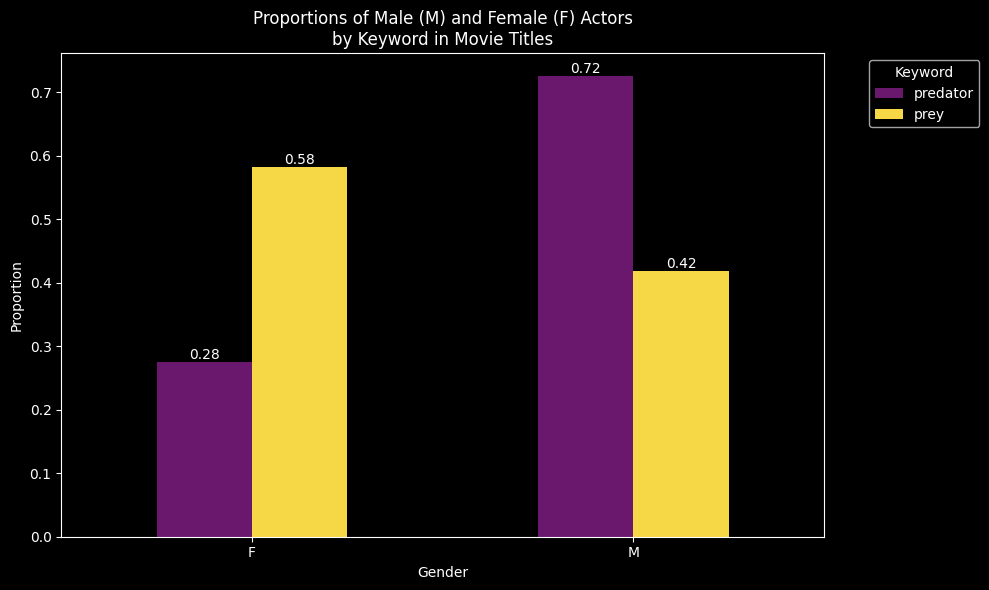

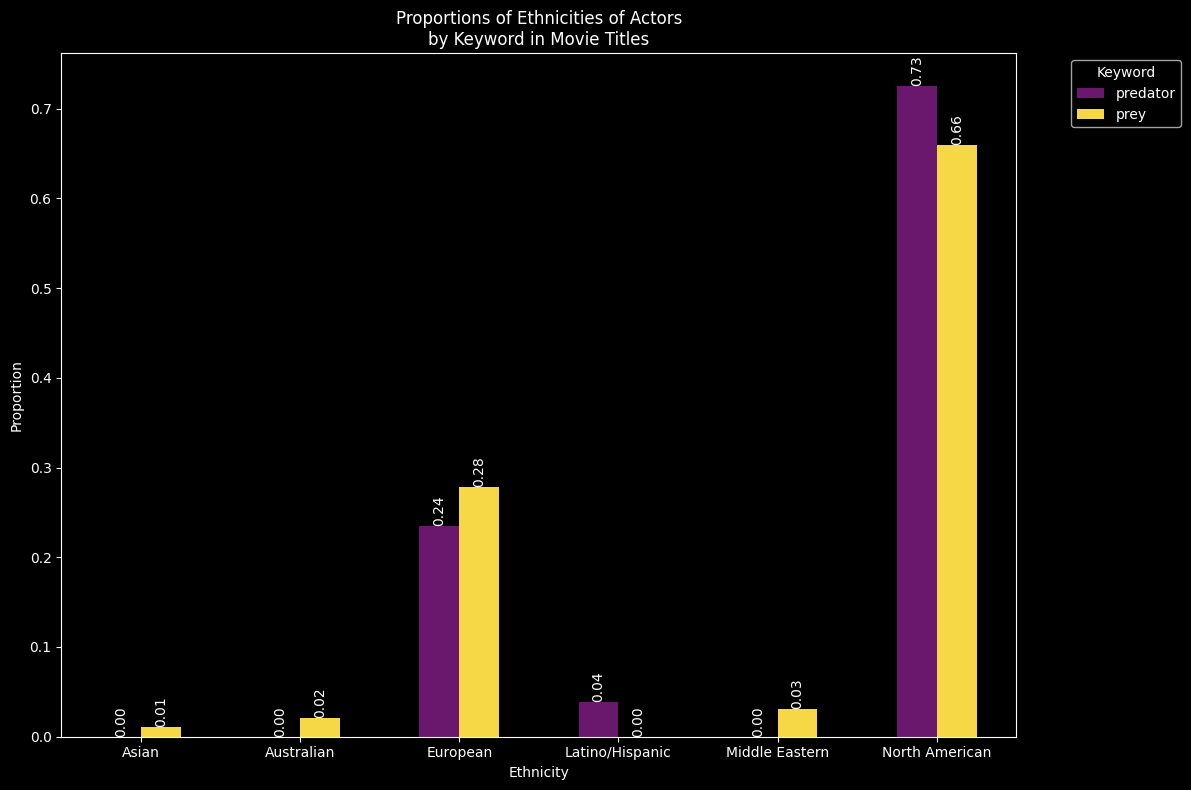

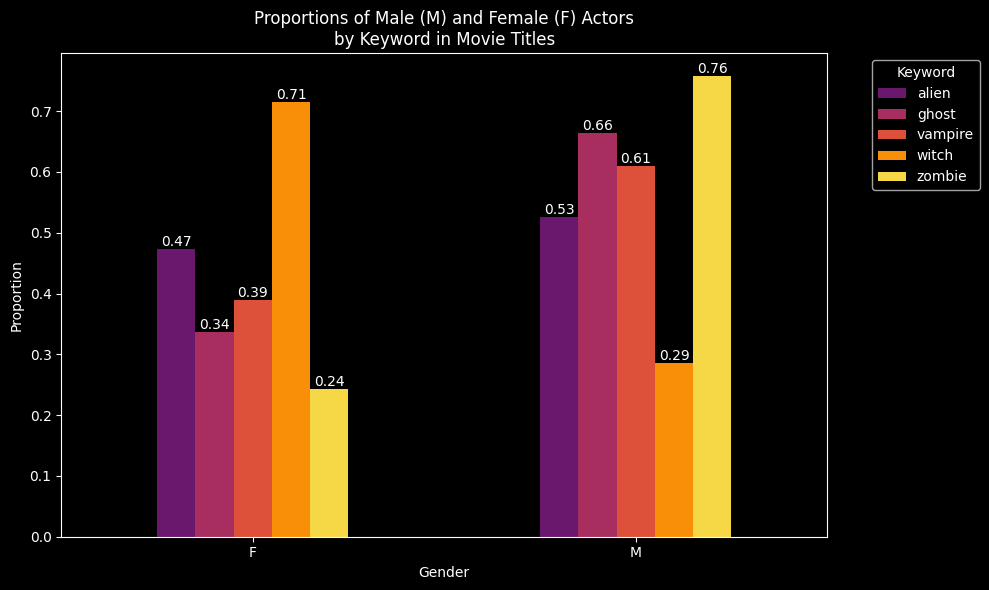

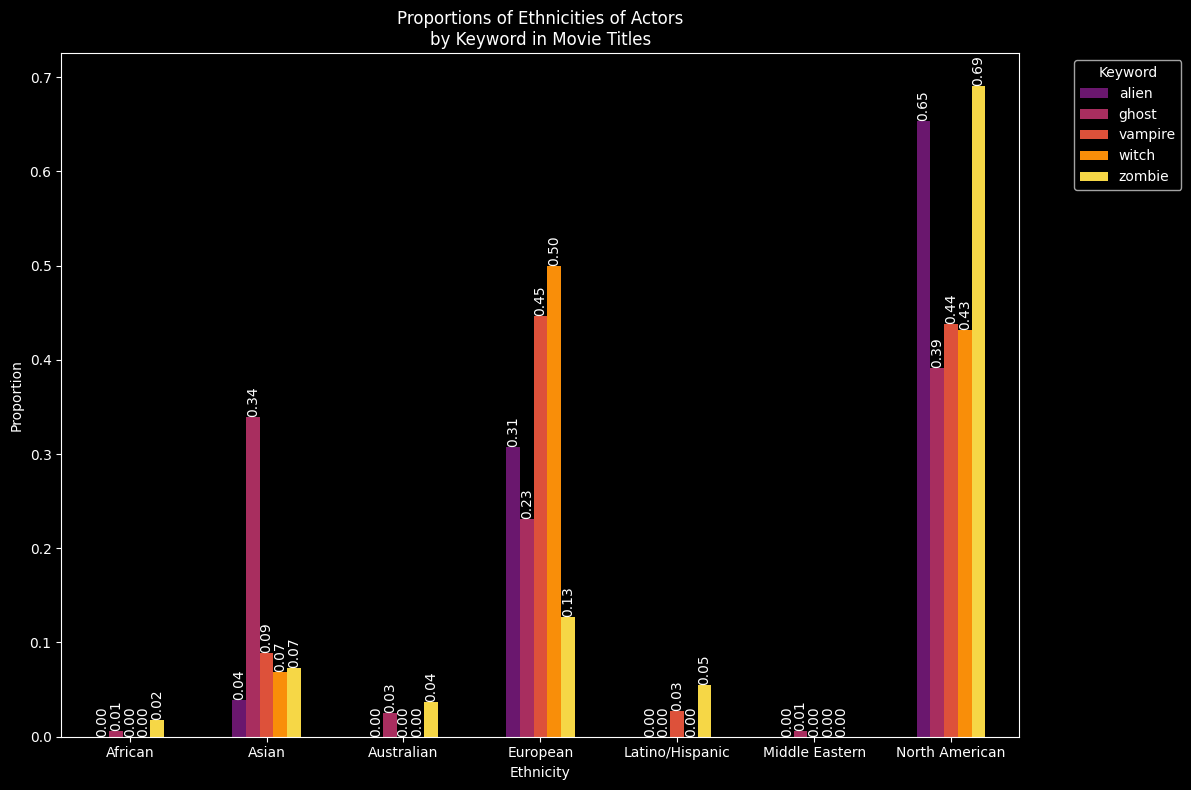

In [11]:
# compare actor profiles in movies with different 'monsters' in their titles
plot_demographics_multiple_keywords([prey_df, predator_df], ['prey', 'predator'])
# compare actor profiles in movies with 'predator' and 'prey' in their titles
plot_demographics_multiple_keywords([alien_df, zombie_df, vampire_df, witch_df, ghost_df], ['alien', 'zombie', 'vampire', 'witch', 'ghost'])